In [129]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df_contracts = pd.read_csv('contracts.csv')
df_sales = pd.read_csv('sales.csv')

In [3]:
print(df_contracts)

    Unnamed: 0                            company_id approval_date  \
0           10  08e40343-54aa-49d1-9317-4dbcd16ee70f    2021-11-16   
1           14  0c60cc83-42ac-4229-9cdd-3a2887400d32    2022-06-16   
2           35  23e567c2-874f-45f5-b948-bc344f3ffd6a    2022-07-28   
3           42  2d7df42a-eaf3-4de9-986f-e019dc266734    2022-05-18   
4           70  456f807a-8a8d-46e2-9673-d6e062b0a56f    2022-08-07   
5           77  4aa416b8-a0da-48b1-b4a1-92dec7fb9a34    2021-09-09   
6           87  59966dc2-27cb-475a-b630-25c52700b6f7    2021-03-03   
7           97  62e5f890-c221-4c93-a60c-2c9a4aeede16    2020-07-30   
8          135  90e7fe2b-1136-41fe-97c0-93059c1f4087    2022-02-02   
9          142  9a88bfc0-ef6c-4162-8b52-0f6edaf1b3a2    2022-05-30   
10         147  a274268d-85f0-4b82-bc3b-5cd245f162b9    2022-05-30   
11         160  b1fe96ab-d300-4c96-b714-859b11ddb755    2021-09-27   
12         164  b45c2224-29da-4854-ae92-24f48e04798a    2022-05-18   
13         166  b5ba

In [4]:
print(df_sales)

       Unnamed: 0        date      sales                             client_id
0               0  2022-04-10  196865.25  08e40343-54aa-49d1-9317-4dbcd16ee70f
1               1  2022-04-19  275584.92  08e40343-54aa-49d1-9317-4dbcd16ee70f
2               2  2022-04-29   57693.56  08e40343-54aa-49d1-9317-4dbcd16ee70f
3               3  2022-05-27  354177.19  08e40343-54aa-49d1-9317-4dbcd16ee70f
4               4  2021-10-12  231843.95  08e40343-54aa-49d1-9317-4dbcd16ee70f
...           ...         ...        ...                                   ...
14093         733  2022-08-11       0.00  fc054669-1734-4e44-a47c-e344302f8e17
14094         734  2022-08-12       0.00  fc054669-1734-4e44-a47c-e344302f8e17
14095         735  2022-08-13       0.00  fc054669-1734-4e44-a47c-e344302f8e17
14096         736  2022-08-14       0.00  fc054669-1734-4e44-a47c-e344302f8e17
14097         737  2022-08-15       0.00  fc054669-1734-4e44-a47c-e344302f8e17

[14098 rows x 4 columns]


Se realiza un agrupado de las ventas del cliente a traves del tiempo, utilizando una llave año-semana de ventas

In [59]:
df_sales["wk"] = (pd.DatetimeIndex(df_sales["date"]).year.astype(str).str[-2:] + pd.to_datetime(df_sales["date"]).dt.strftime('%U')).astype(int)

In [60]:
df_contracts["wk_contracts"] = (pd.DatetimeIndex(df_contracts["approval_date"]).year.astype(str).str[-2:] + pd.to_datetime(df_contracts["approval_date"]).dt.strftime('%U')).astype("int")

In [100]:
## Suma acumulada
##df_group = df_sales[["client_id", "wk", "sales"]].sort_values(["client_id", "wk"]).groupby(["client_id", "wk"]).sum().groupby(level=0).cumsum().reset_index()

In [115]:
df_group = df_sales[["client_id", "wk", "sales"]].sort_values(["client_id", "wk"]).groupby(["client_id", "wk"]).sum().reset_index()

In [116]:
df_group

,client_id,wk,sales
0,08e40343-54aa-49d1-9317-4dbcd16ee70f,2109,0.00
1,08e40343-54aa-49d1-9317-4dbcd16ee70f,2110,0.00
2,08e40343-54aa-49d1-9317-4dbcd16ee70f,2111,770792.19
3,08e40343-54aa-49d1-9317-4dbcd16ee70f,2112,1215419.82
4,08e40343-54aa-49d1-9317-4dbcd16ee70f,2113,1045874.40
...,...,...,...
2061,fc054669-1734-4e44-a47c-e344302f8e17,2231,615590.97
2062,fc054669-1734-4e44-a47c-e344302f8e17,2232,46412.64
2063,fc054669-1734-4e44-a47c-e344302f8e17,2233,0.00
2064,fc054669-1734-4e44-a47c-e344302f8e17,2234,0.00


In [117]:
df = df_group.merge(df_contracts,
        how = "left",
        left_on = "client_id",
        right_on = "company_id"
    )

filtro_nulos = df["company_id"].isnull()

if len(df[filtro_nulos]) > 0:
        print("Existes ventas sin contratos ligados")
else:
        print("Todas las ventas tienen un contrato ligado")

Todas las ventas tienen un contrato ligado


Se crea un identificador de ventas con contrato activo

In [118]:
df["identificador_contrato"] = np.where(df["wk"] < df["wk_contracts"], False, True)

Se eliminan columnas que no interesan

In [119]:
df.columns

Index(['client_id', 'wk', 'sales', 'Unnamed: 0', 'company_id', 'approval_date',
       'id', 'wk_contracts', 'identificador_contrato'],
      dtype='object')

In [120]:
drop_columns = ["Unnamed: 0", "id"]


In [106]:
df = df.drop(columns=drop_columns)

Se identifican a los clientes

In [121]:
clientes = np.unique(df["client_id"])

historico de ventas por semana del cliente  08e40343-54aa-49d1-9317-4dbcd16ee70f  identificando cuando se comenzo el contrato


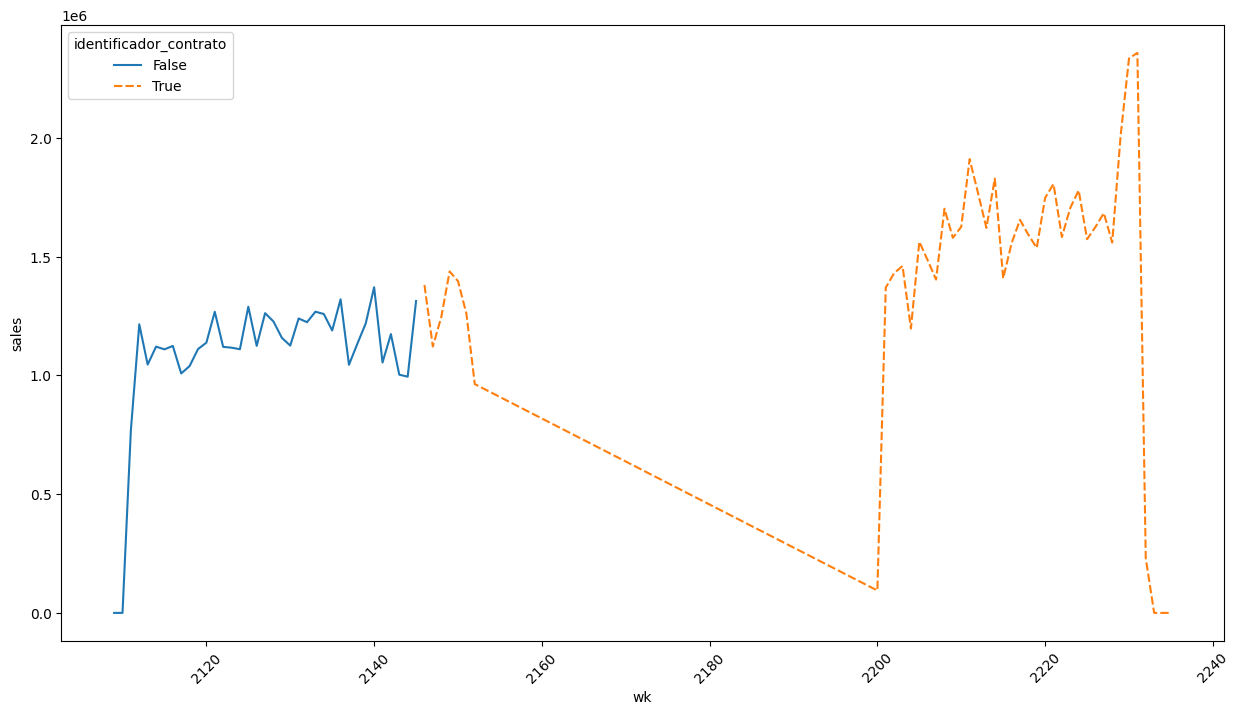

Comparativo de ventas cuando se tuvo o no contrato de: 08e40343-54aa-49d1-9317-4dbcd16ee70f


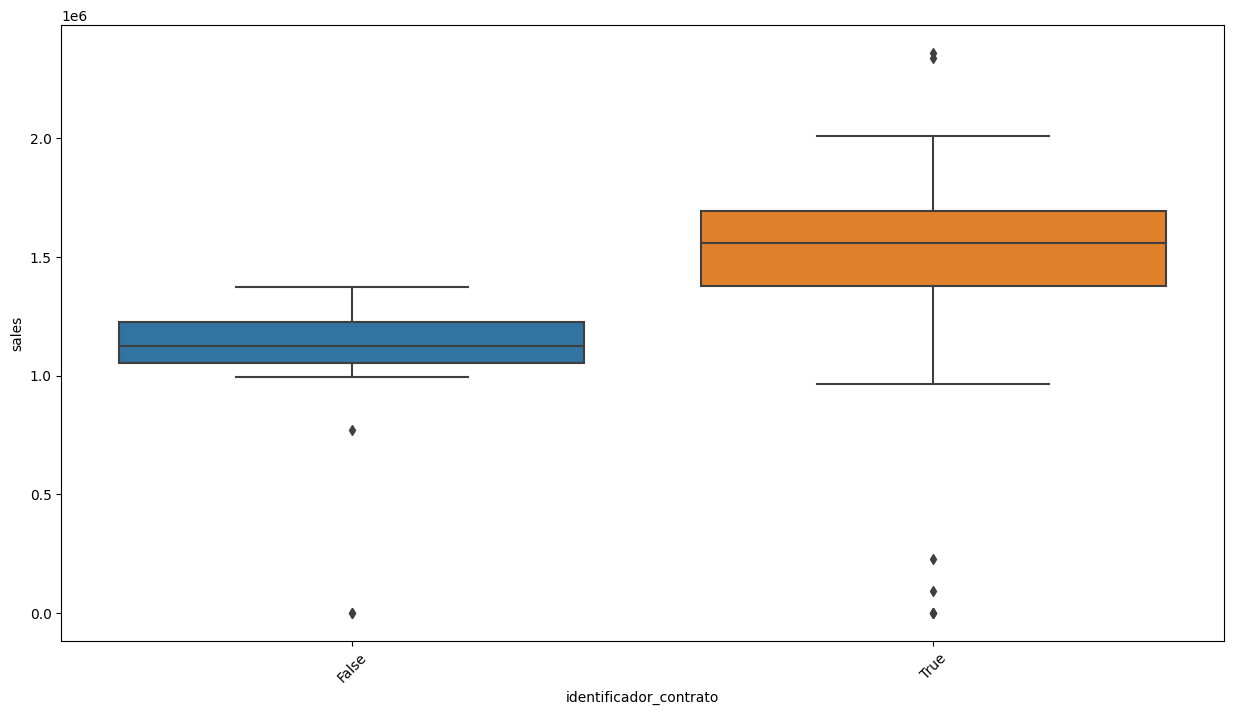

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
Se rechaza que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  0c60cc83-42ac-4229-9cdd-3a2887400d32  identificando cuando se comenzo el contrato


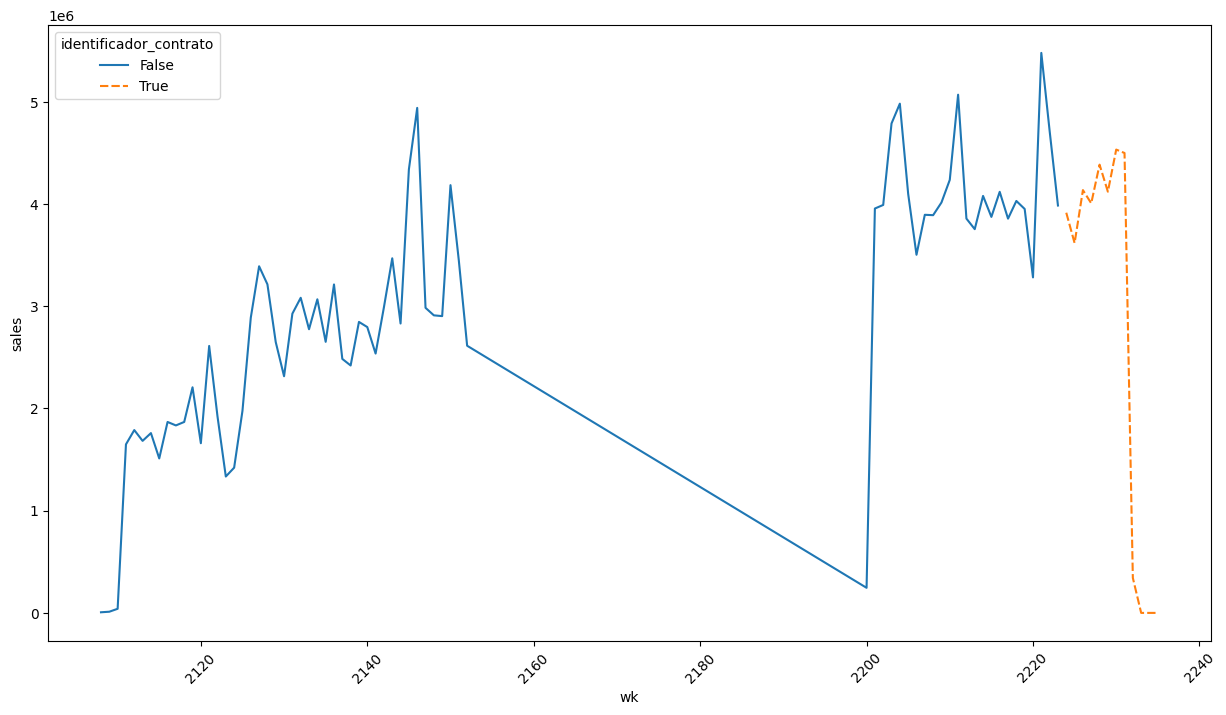

Comparativo de ventas cuando se tuvo o no contrato de: 0c60cc83-42ac-4229-9cdd-3a2887400d32


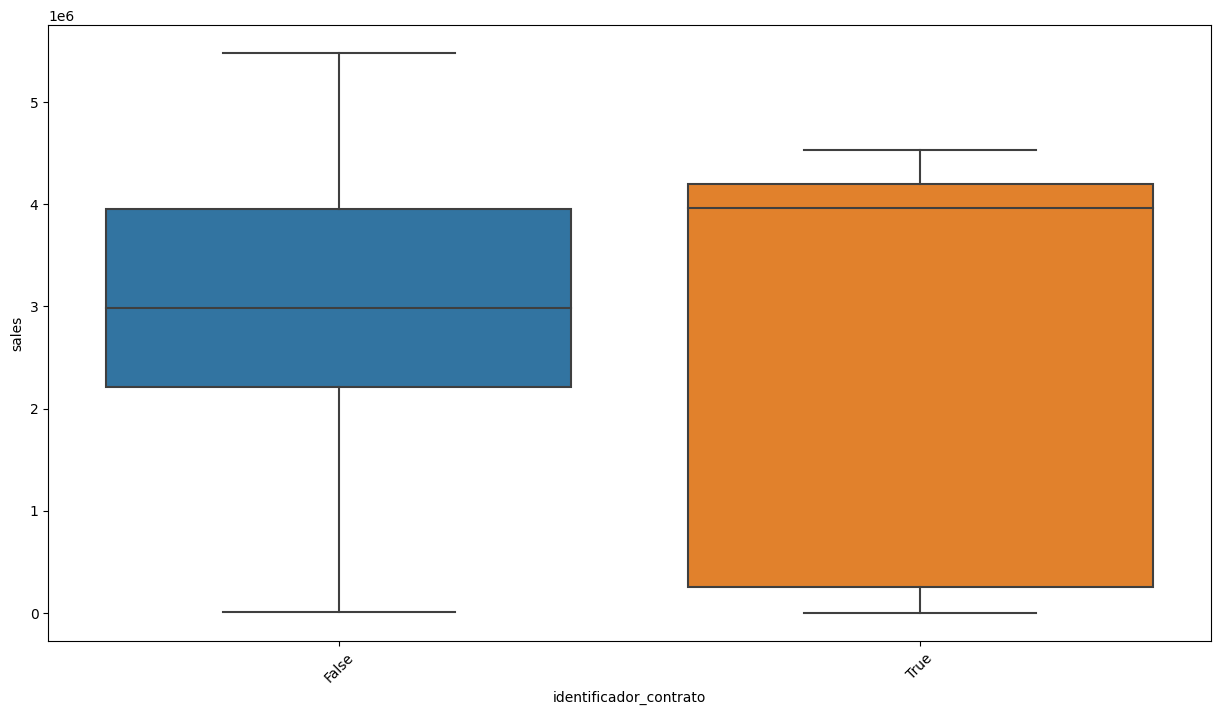

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  23e567c2-874f-45f5-b948-bc344f3ffd6a  identificando cuando se comenzo el contrato


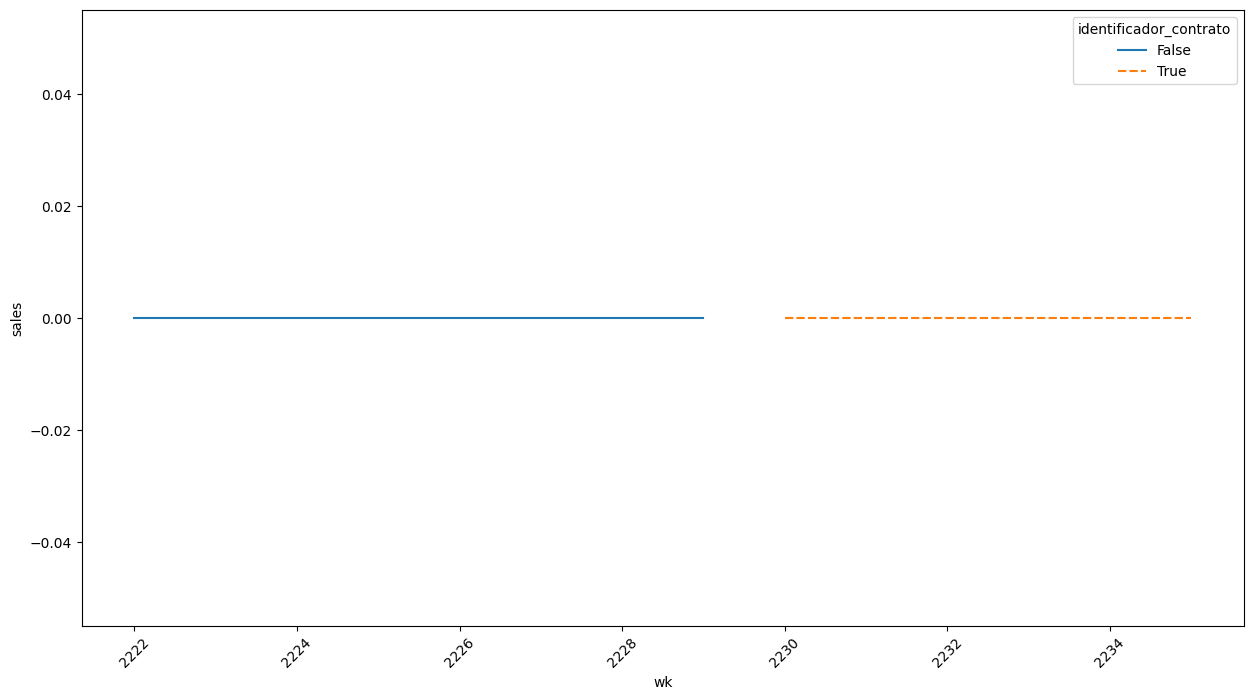

Comparativo de ventas cuando se tuvo o no contrato de: 23e567c2-874f-45f5-b948-bc344f3ffd6a


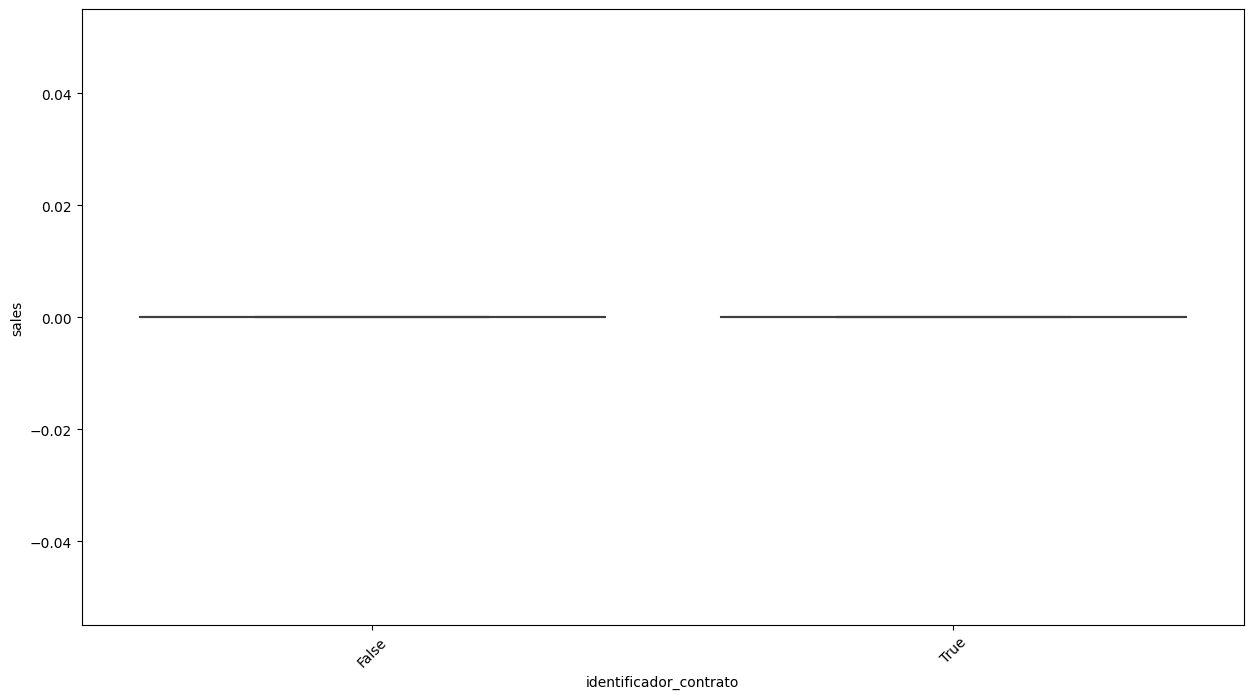

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  2d7df42a-eaf3-4de9-986f-e019dc266734  identificando cuando se comenzo el contrato


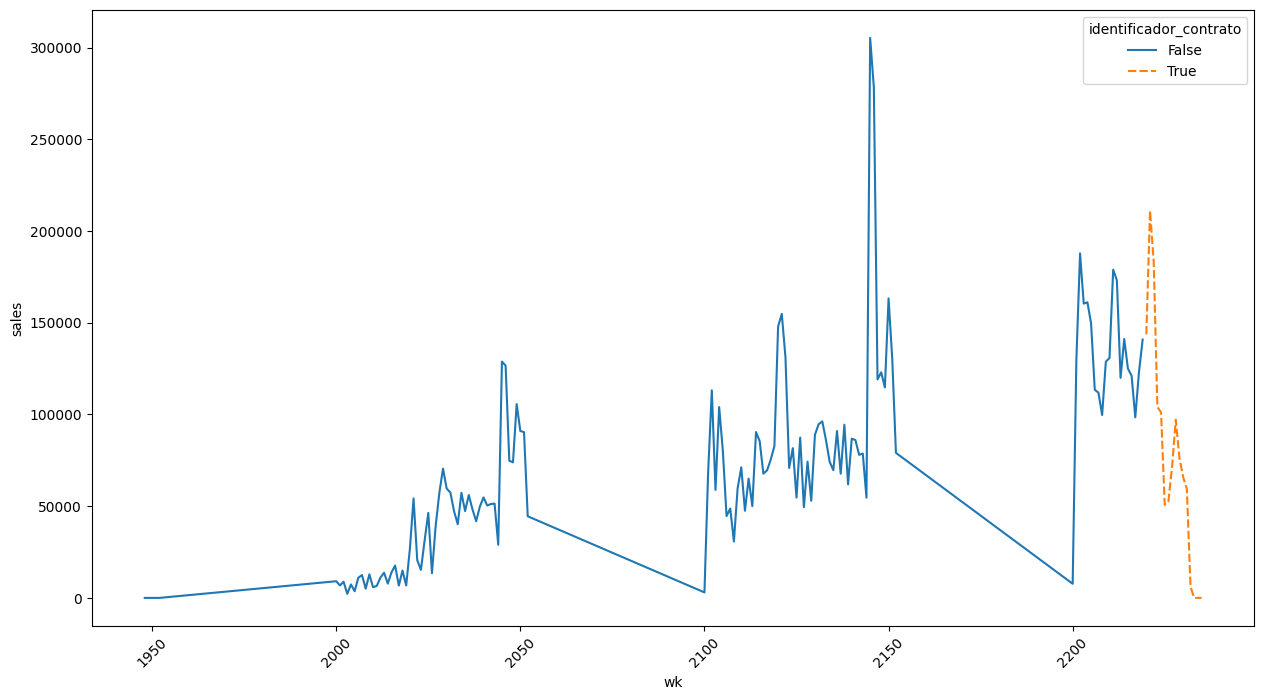

Comparativo de ventas cuando se tuvo o no contrato de: 2d7df42a-eaf3-4de9-986f-e019dc266734


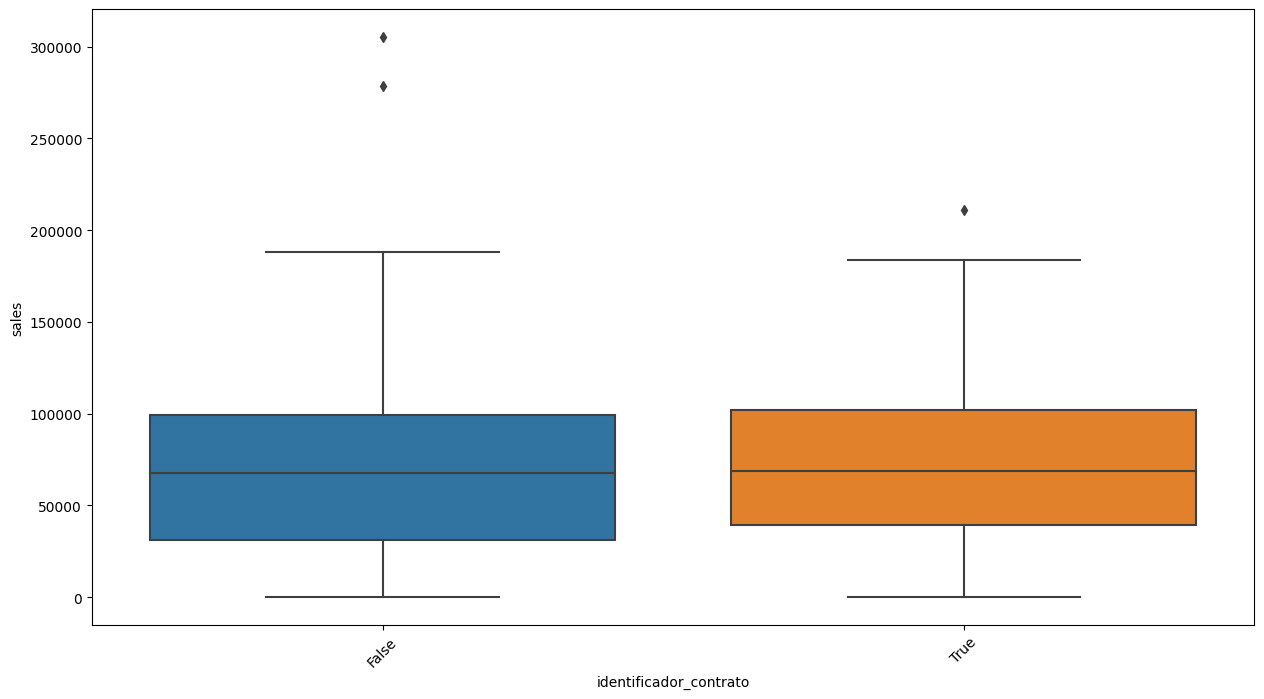

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  456f807a-8a8d-46e2-9673-d6e062b0a56f  identificando cuando se comenzo el contrato


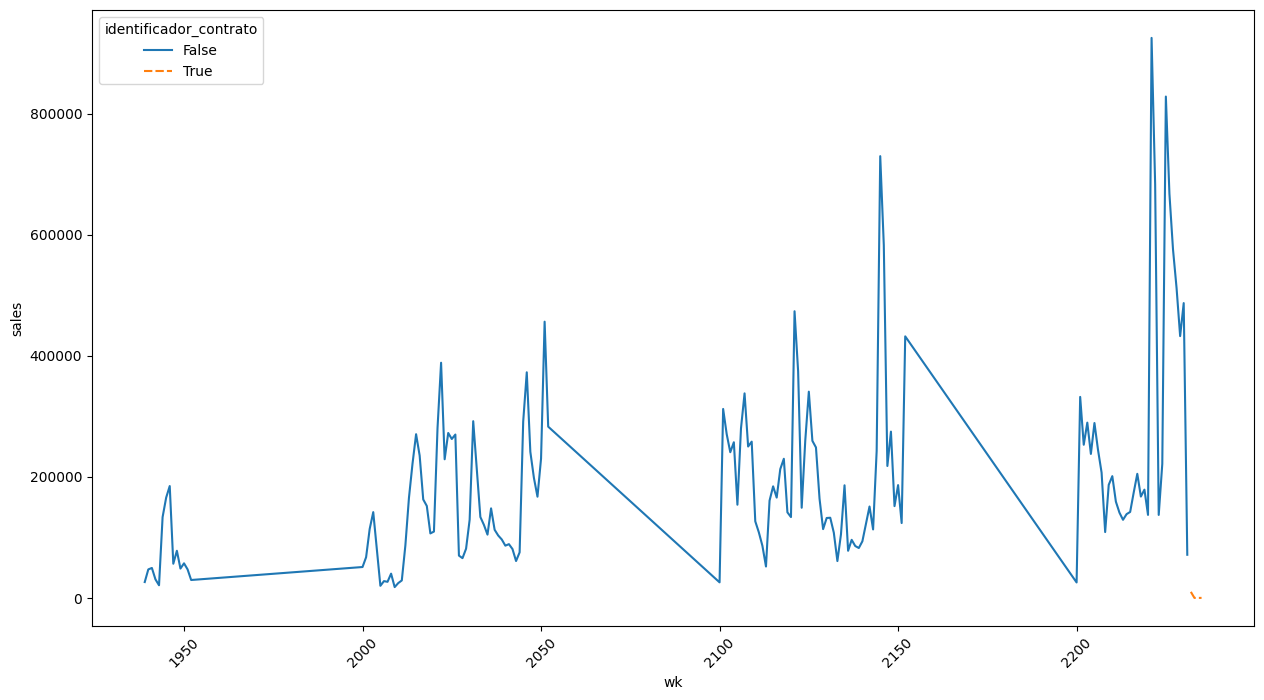

Comparativo de ventas cuando se tuvo o no contrato de: 456f807a-8a8d-46e2-9673-d6e062b0a56f


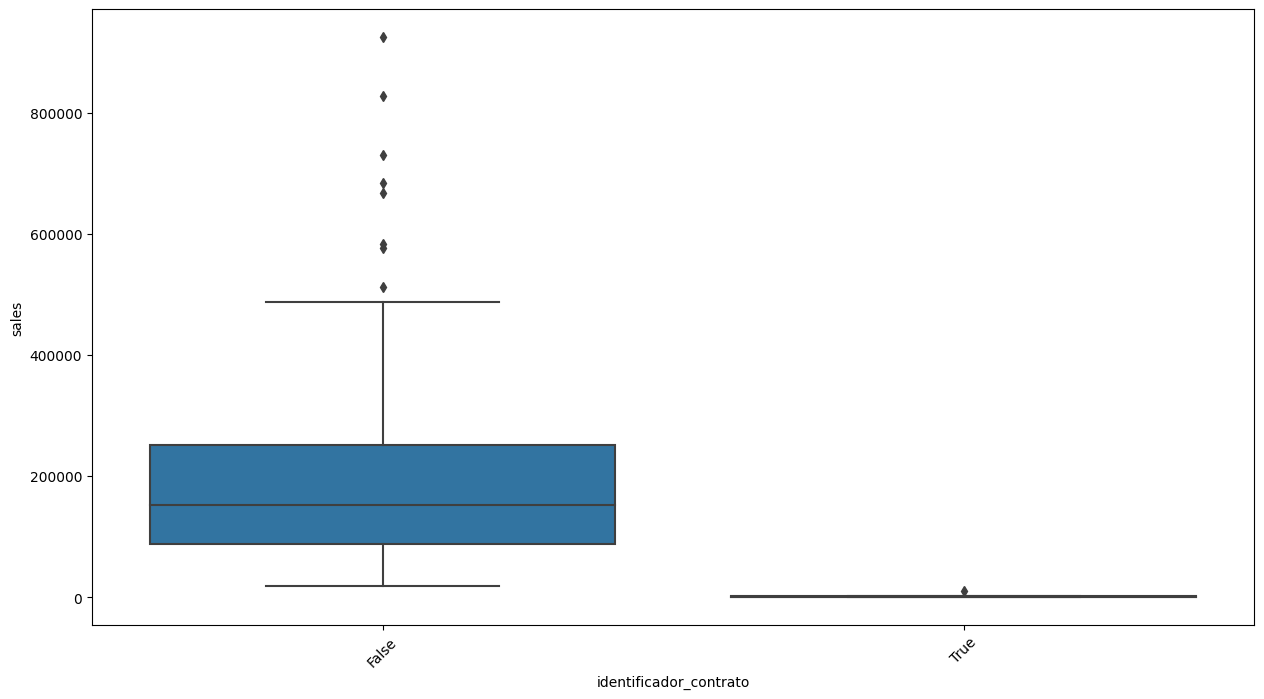

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
Se rechaza que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  4aa416b8-a0da-48b1-b4a1-92dec7fb9a34  identificando cuando se comenzo el contrato


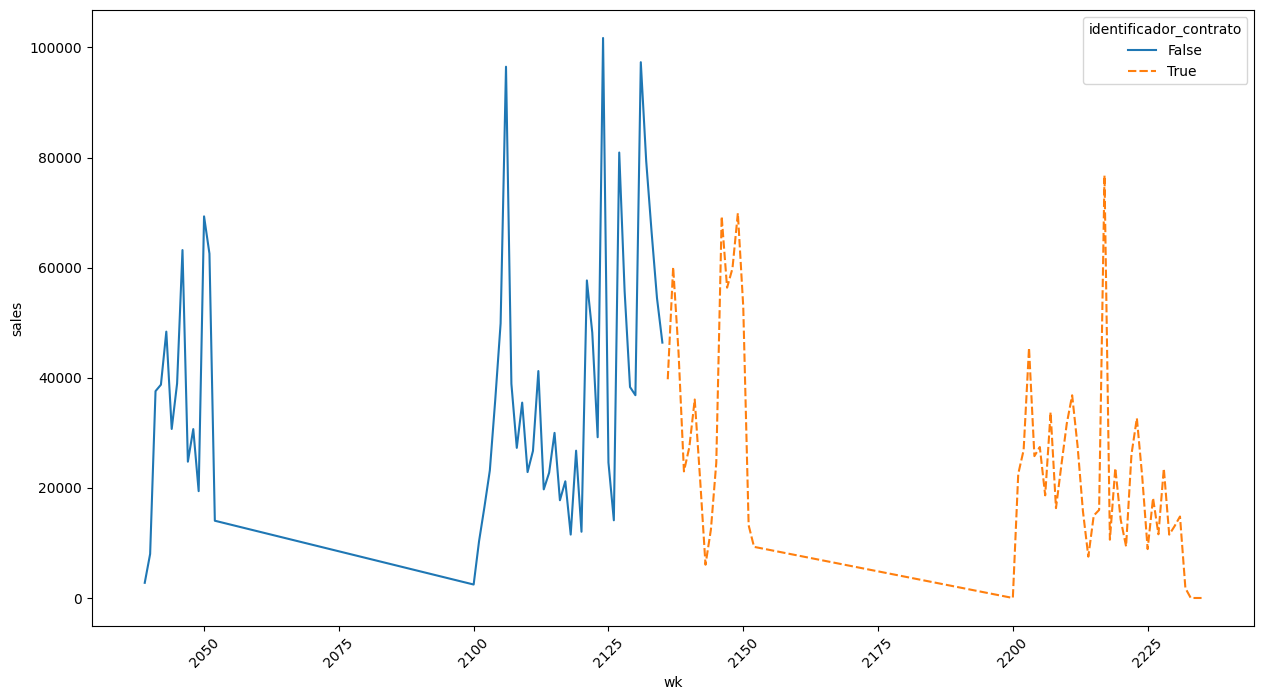

Comparativo de ventas cuando se tuvo o no contrato de: 4aa416b8-a0da-48b1-b4a1-92dec7fb9a34


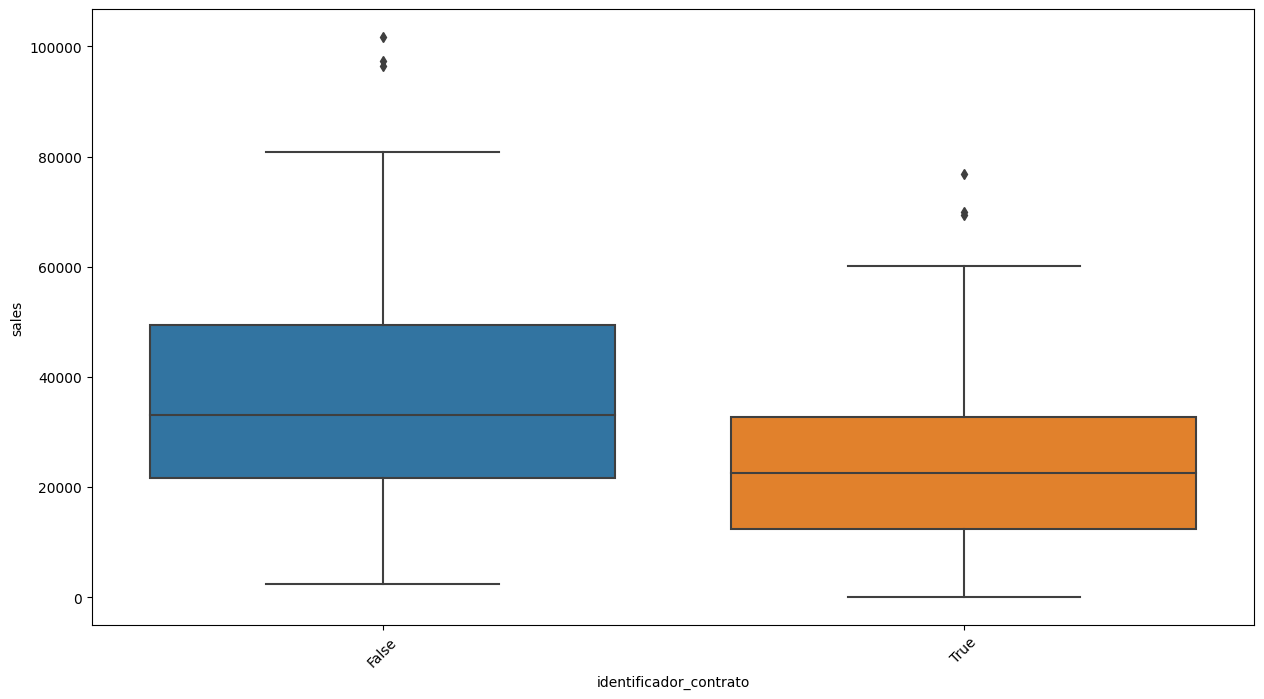

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
Se rechaza que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  59966dc2-27cb-475a-b630-25c52700b6f7  identificando cuando se comenzo el contrato


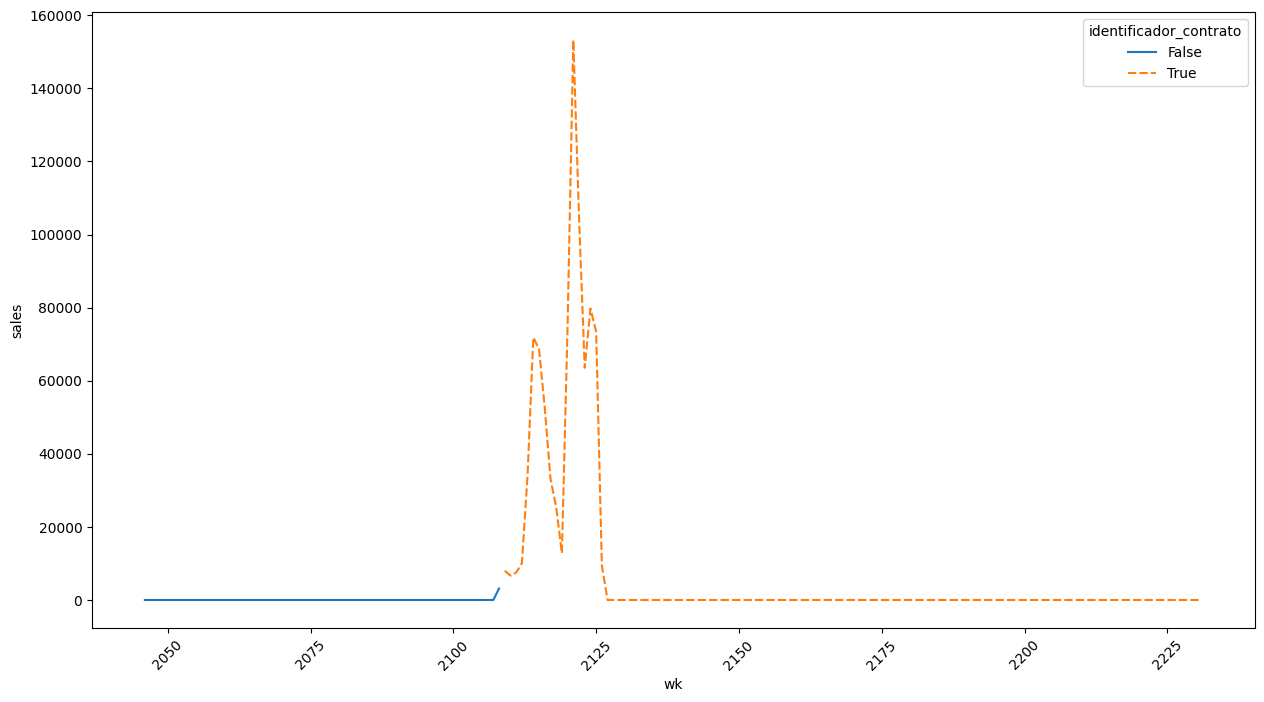

Comparativo de ventas cuando se tuvo o no contrato de: 59966dc2-27cb-475a-b630-25c52700b6f7


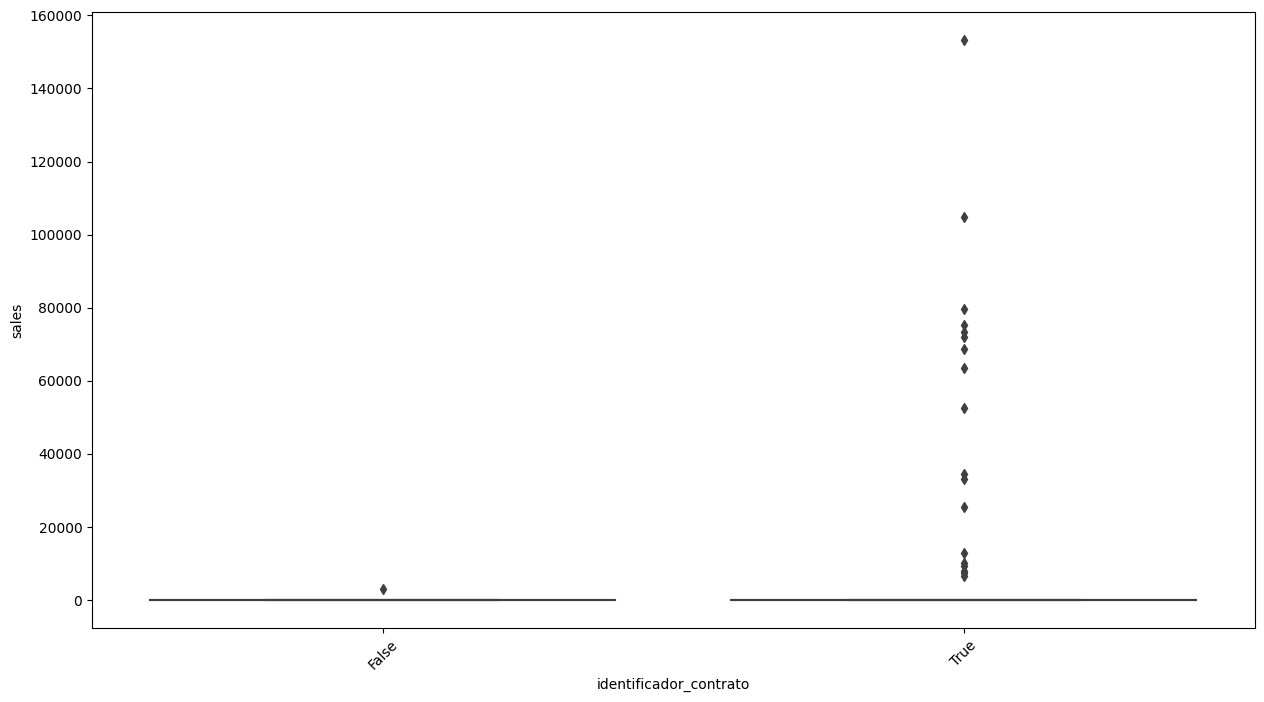

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  62e5f890-c221-4c93-a60c-2c9a4aeede16  identificando cuando se comenzo el contrato


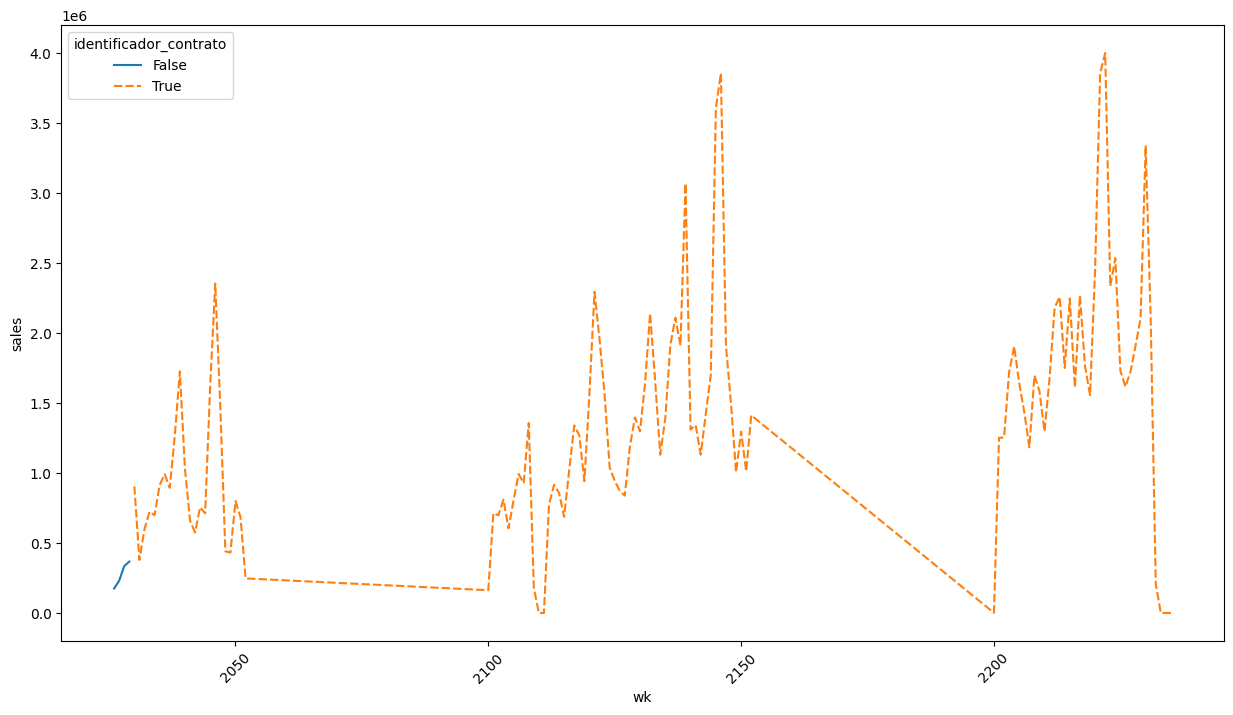

Comparativo de ventas cuando se tuvo o no contrato de: 62e5f890-c221-4c93-a60c-2c9a4aeede16


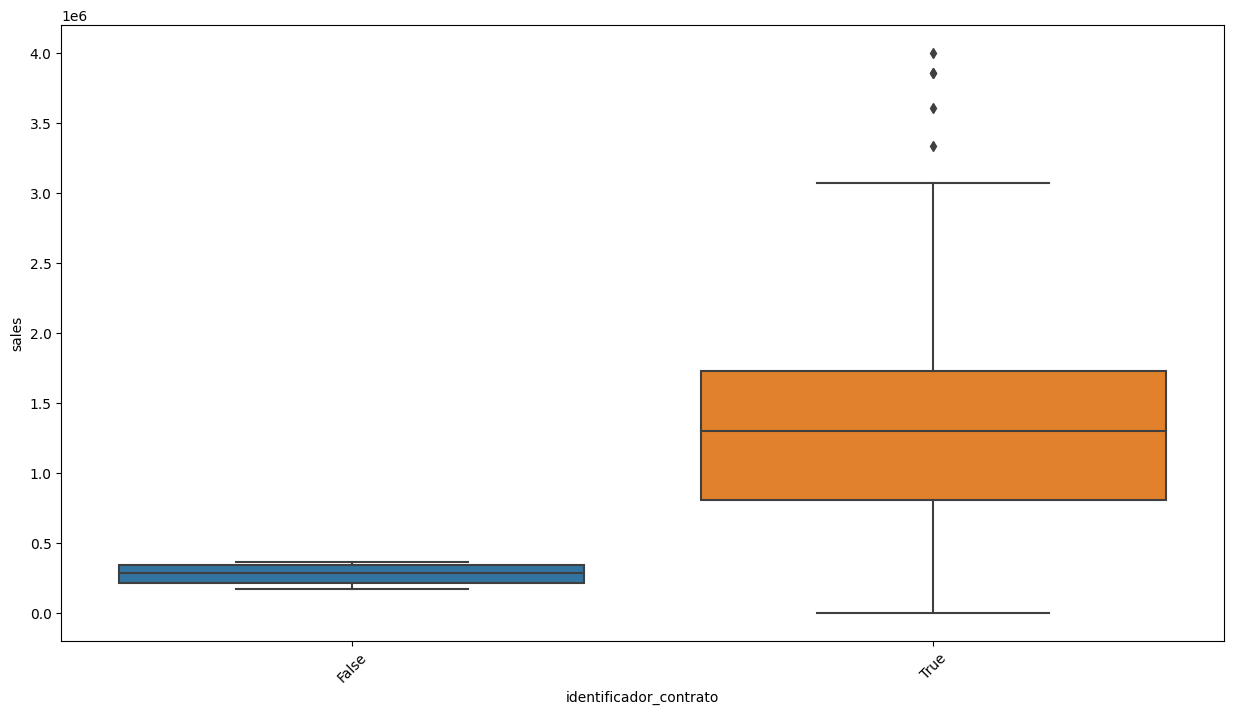

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
Se rechaza que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  90e7fe2b-1136-41fe-97c0-93059c1f4087  identificando cuando se comenzo el contrato


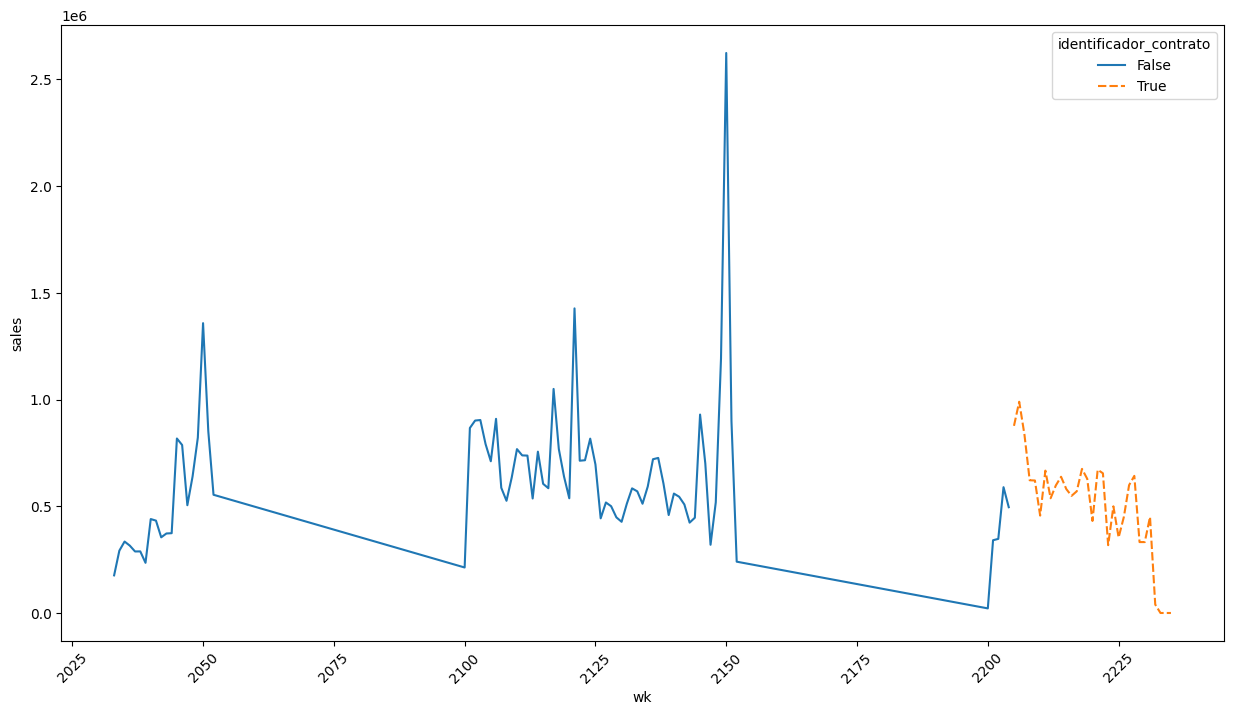

Comparativo de ventas cuando se tuvo o no contrato de: 90e7fe2b-1136-41fe-97c0-93059c1f4087


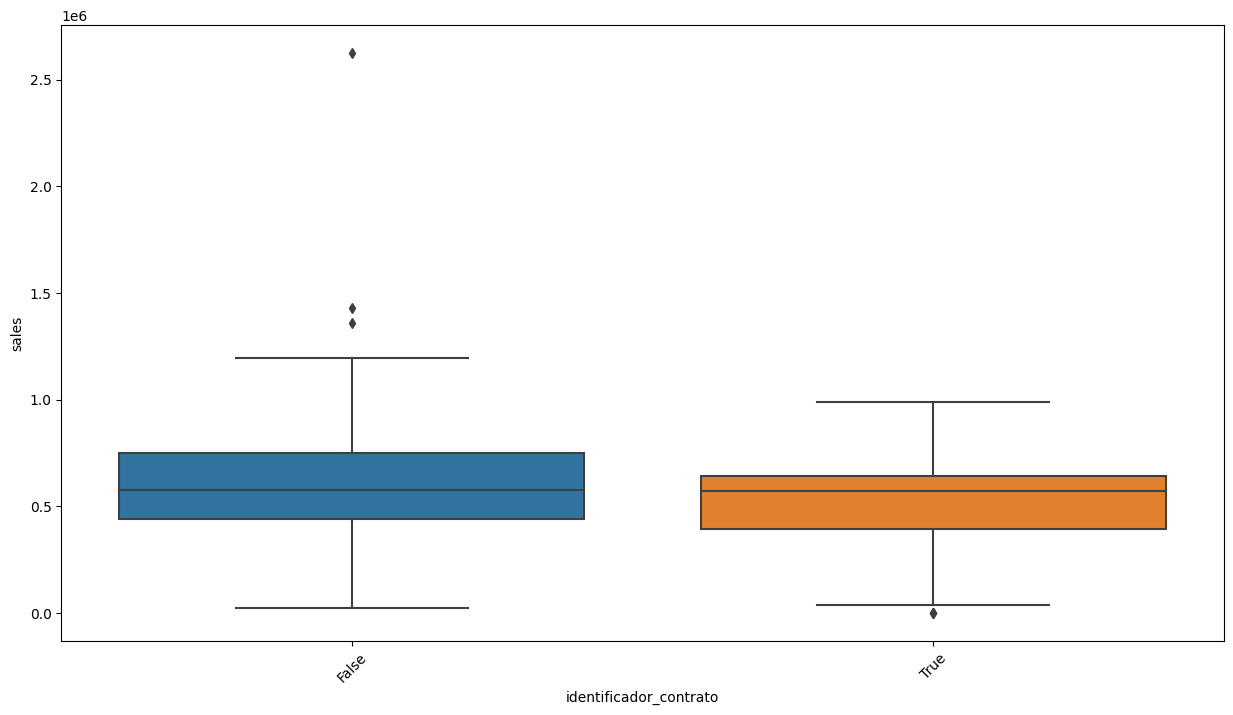

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
Se rechaza que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  9a88bfc0-ef6c-4162-8b52-0f6edaf1b3a2  identificando cuando se comenzo el contrato


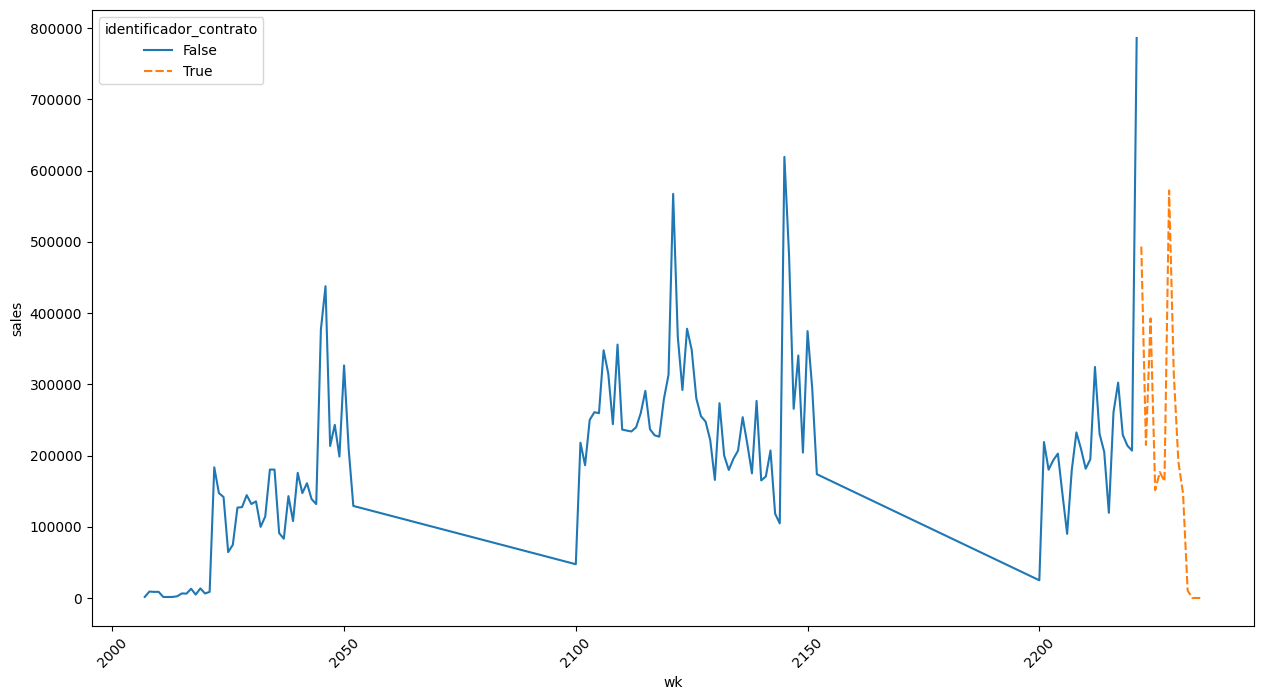

Comparativo de ventas cuando se tuvo o no contrato de: 9a88bfc0-ef6c-4162-8b52-0f6edaf1b3a2


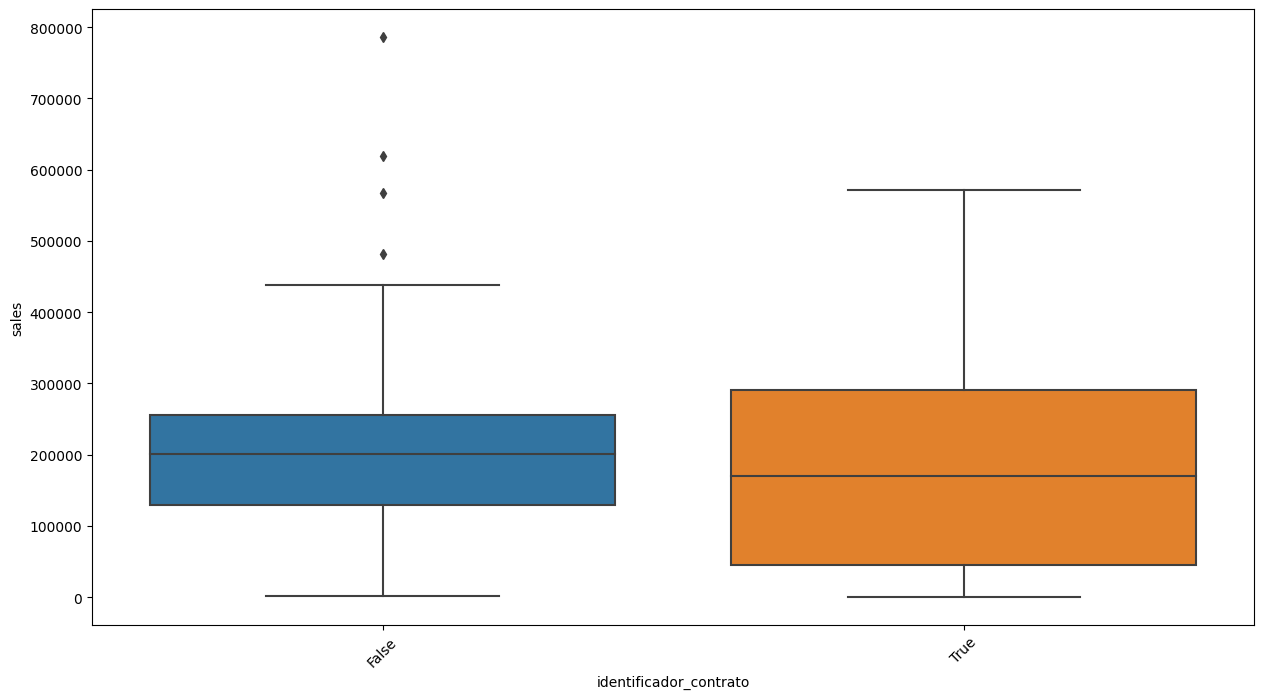

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  a274268d-85f0-4b82-bc3b-5cd245f162b9  identificando cuando se comenzo el contrato


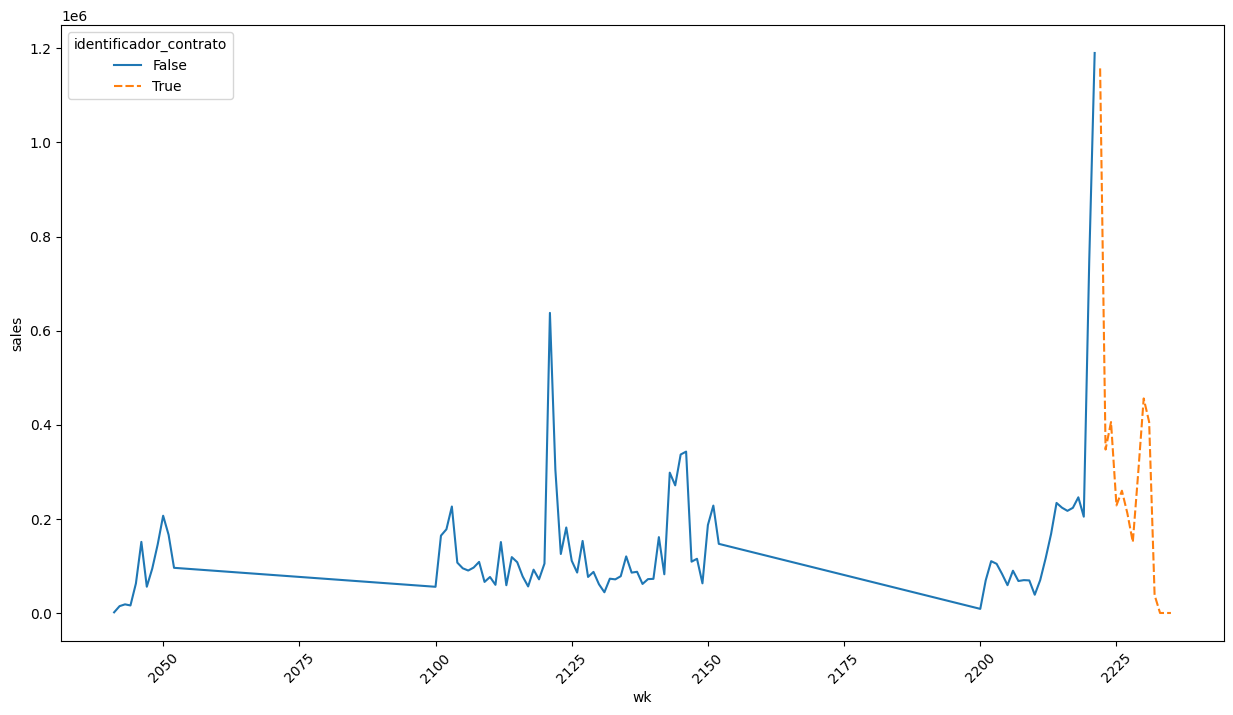

Comparativo de ventas cuando se tuvo o no contrato de: a274268d-85f0-4b82-bc3b-5cd245f162b9


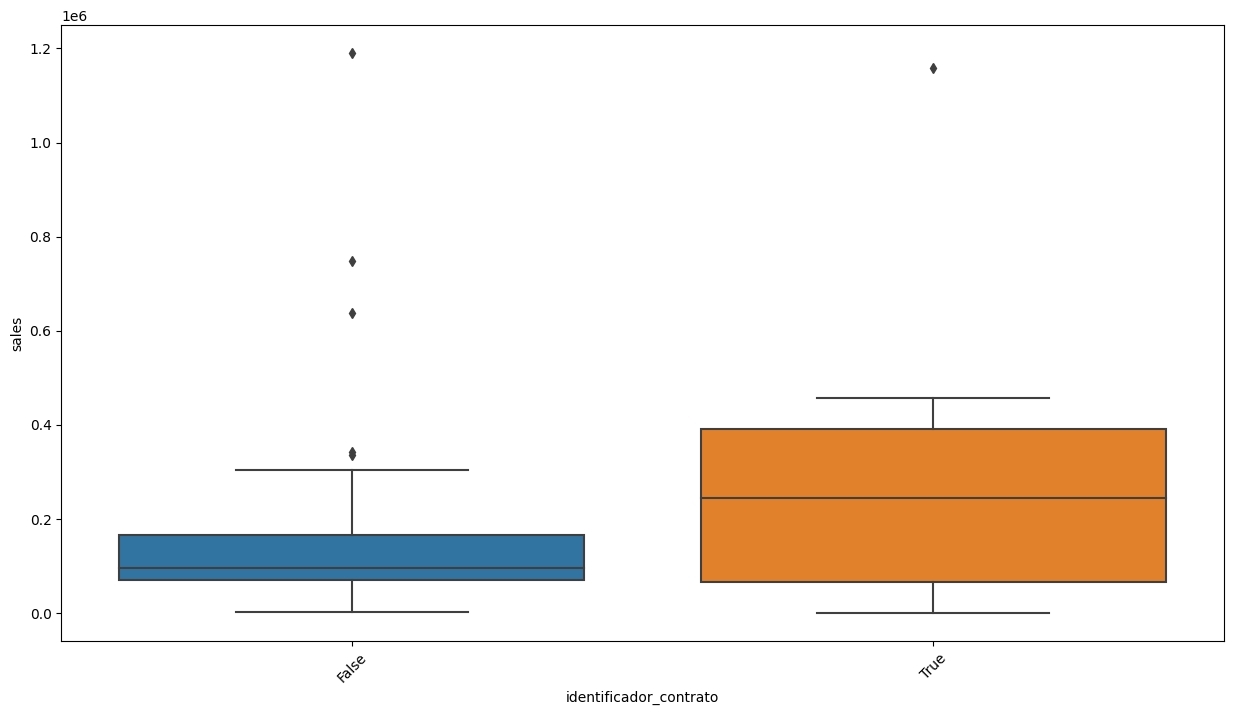

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
Se rechaza que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  b1fe96ab-d300-4c96-b714-859b11ddb755  identificando cuando se comenzo el contrato


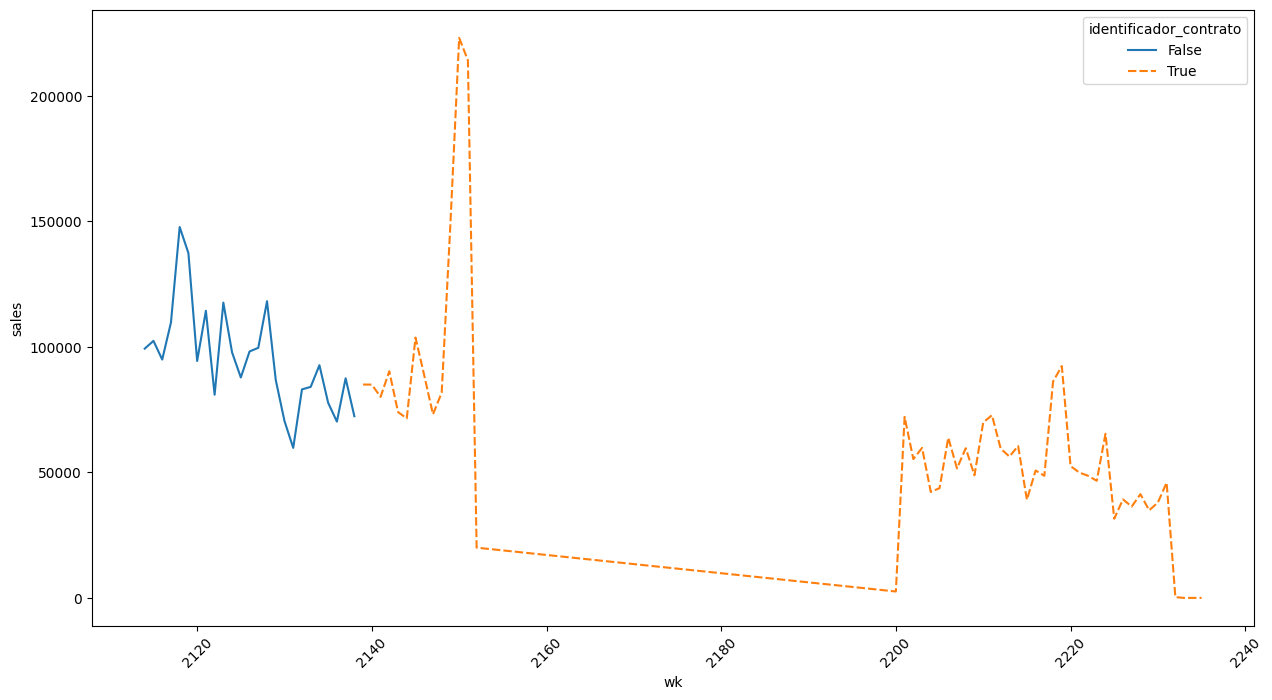

Comparativo de ventas cuando se tuvo o no contrato de: b1fe96ab-d300-4c96-b714-859b11ddb755


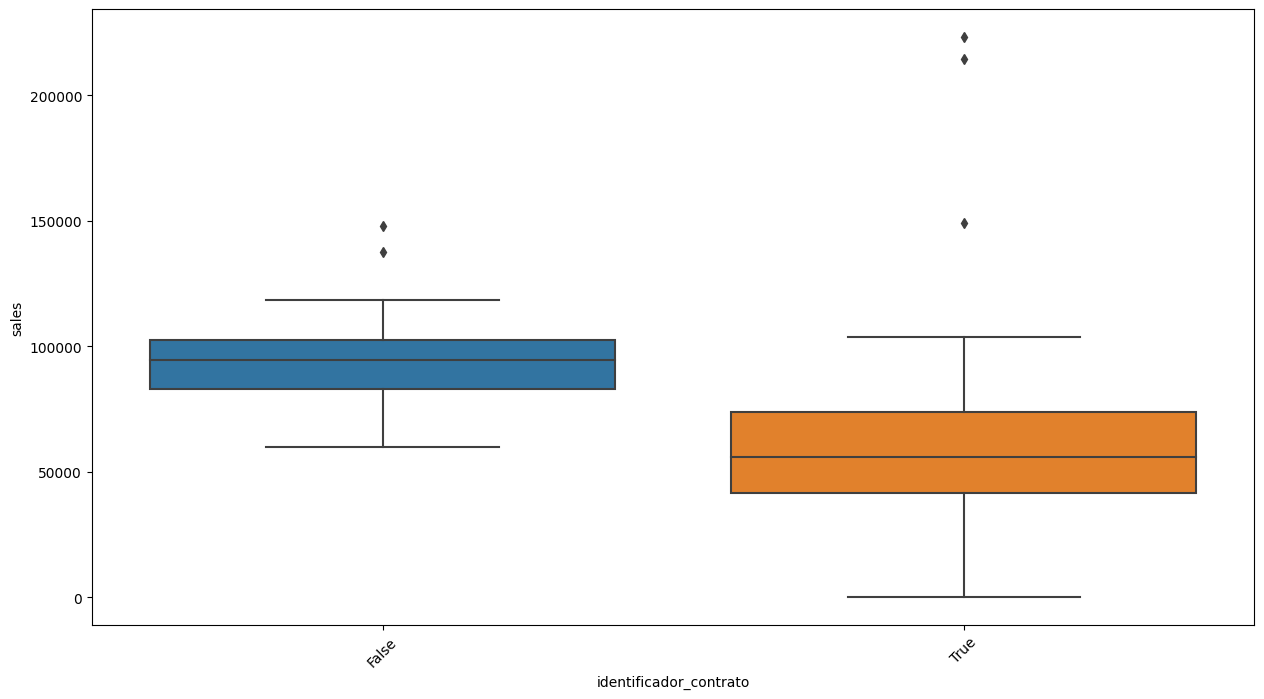

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
Se rechaza que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  b45c2224-29da-4854-ae92-24f48e04798a  identificando cuando se comenzo el contrato


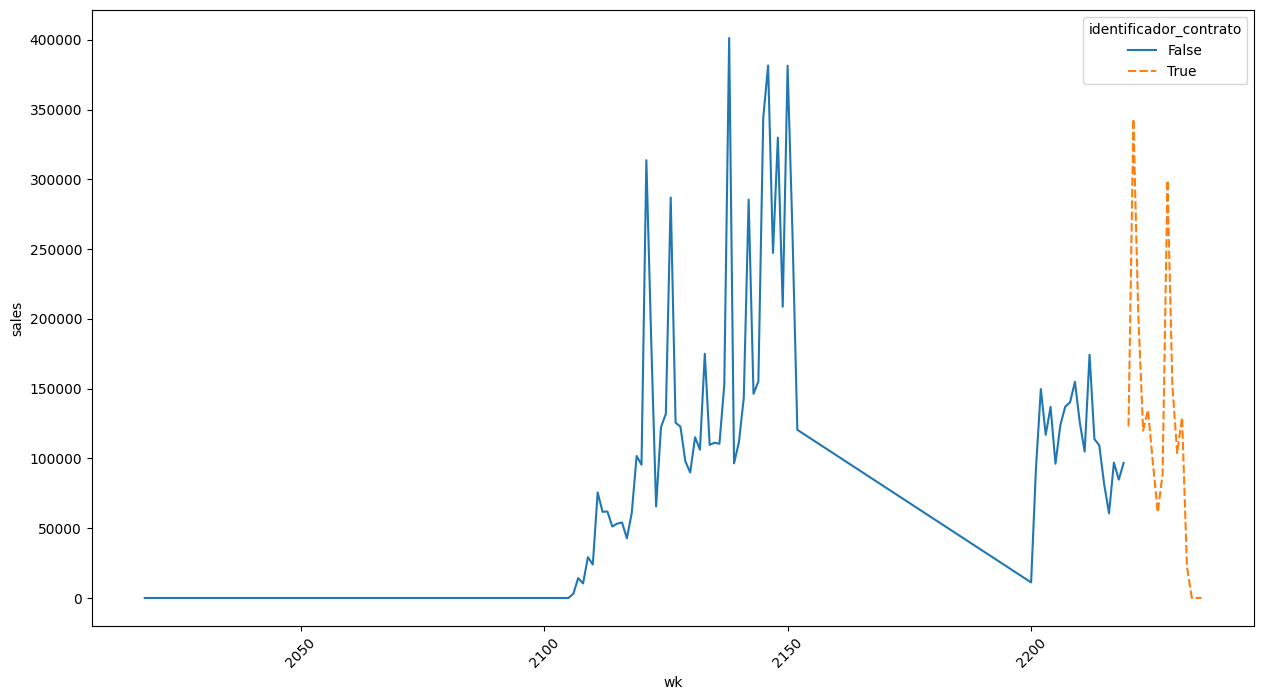

Comparativo de ventas cuando se tuvo o no contrato de: b45c2224-29da-4854-ae92-24f48e04798a


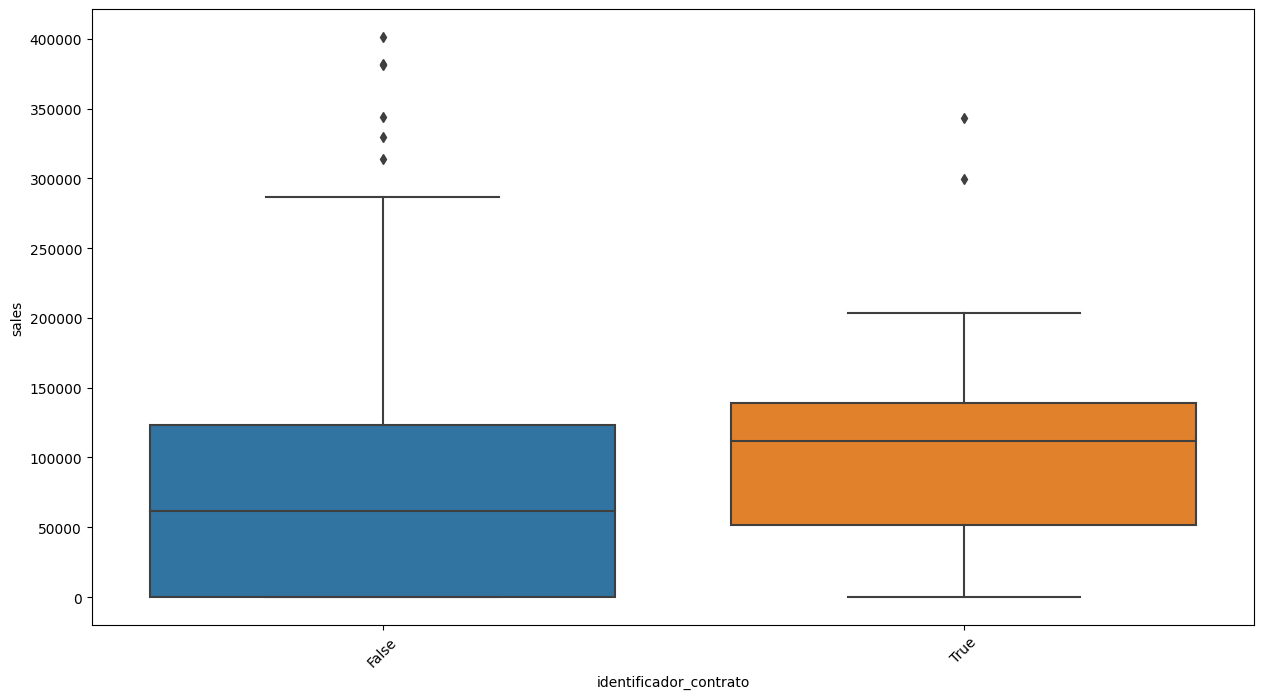

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  b5ba51c5-c829-492f-a7ee-51864f8fcd64  identificando cuando se comenzo el contrato


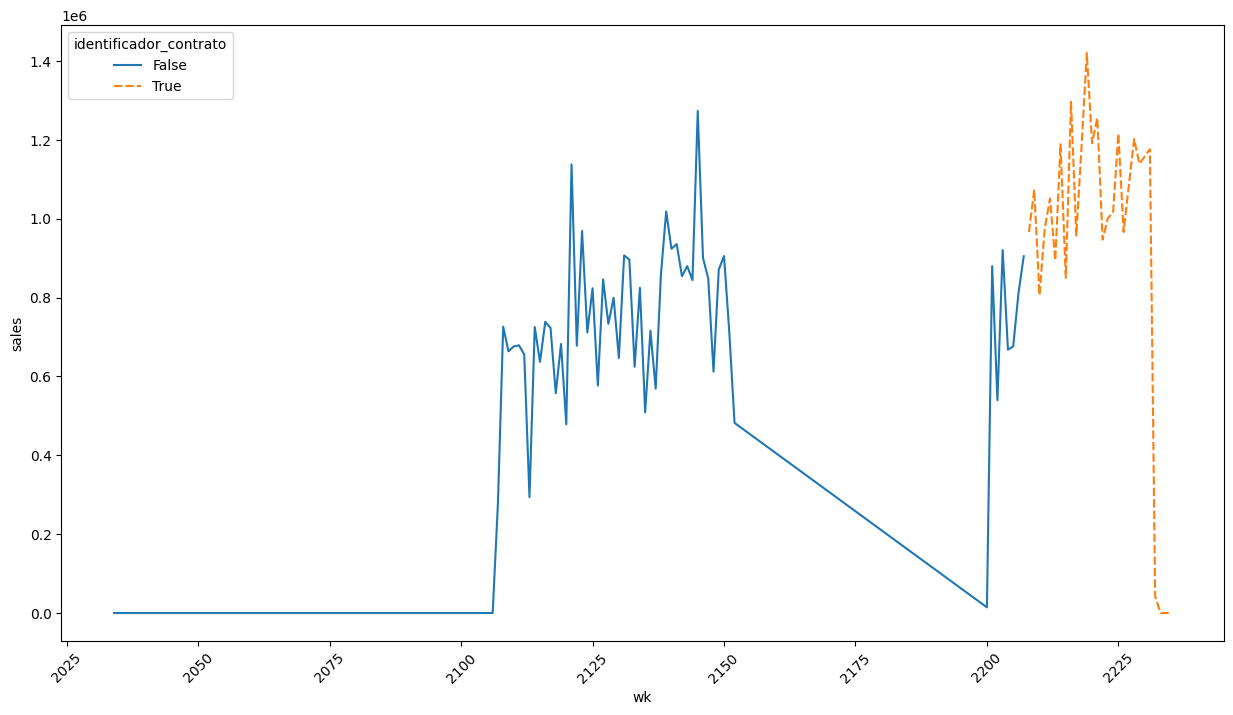

Comparativo de ventas cuando se tuvo o no contrato de: b5ba51c5-c829-492f-a7ee-51864f8fcd64


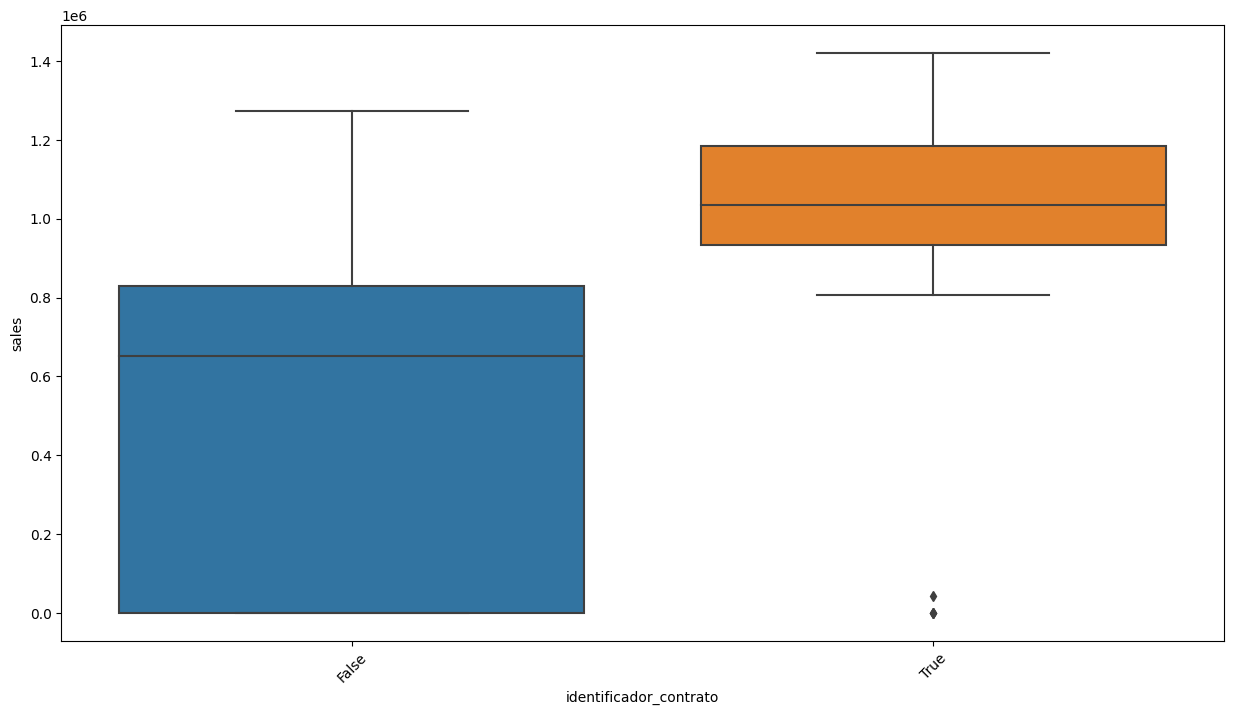

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
Se rechaza que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  c3387258-9ad3-4fc4-887c-34f0f4cf5e0a  identificando cuando se comenzo el contrato


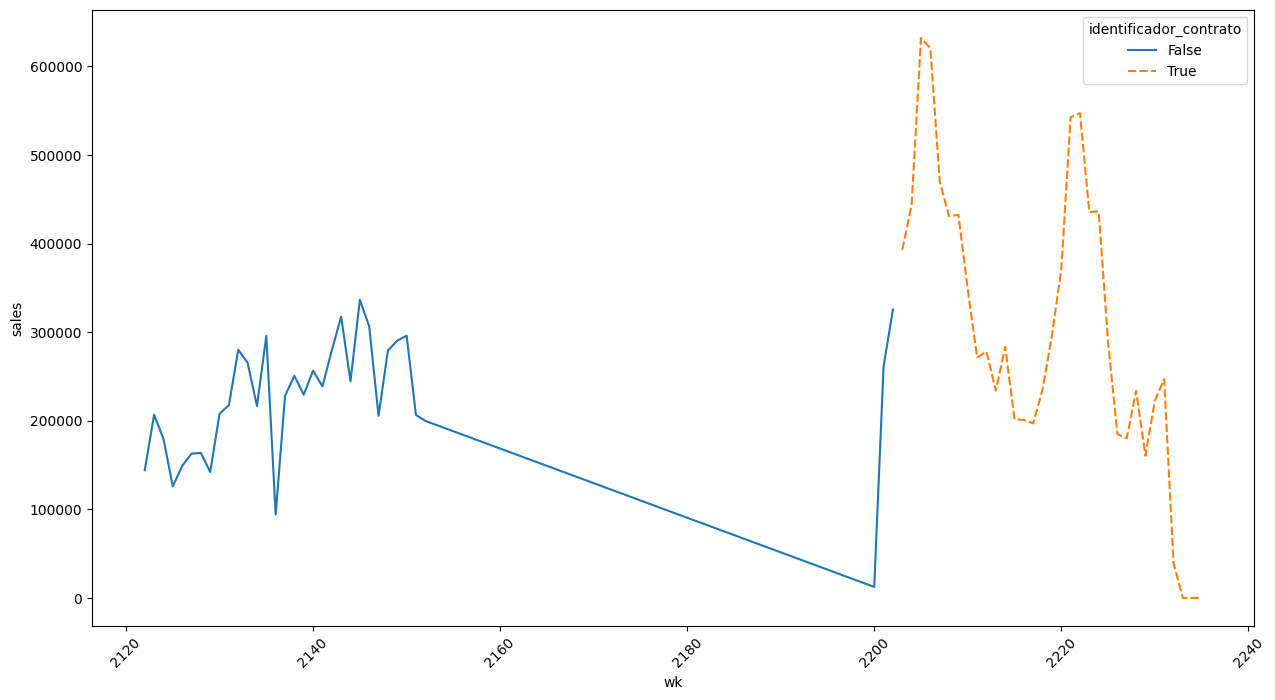

Comparativo de ventas cuando se tuvo o no contrato de: c3387258-9ad3-4fc4-887c-34f0f4cf5e0a


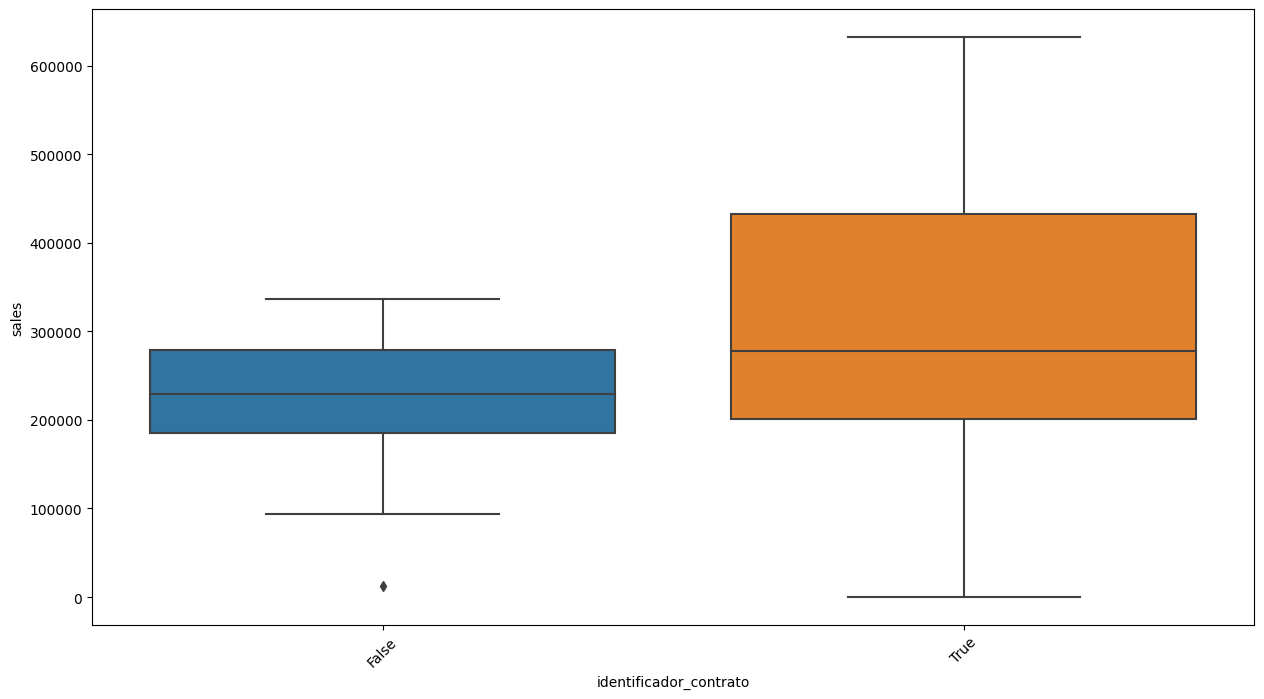

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
Se rechaza que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  c68c0123-360c-4357-8364-8850bc08107e  identificando cuando se comenzo el contrato


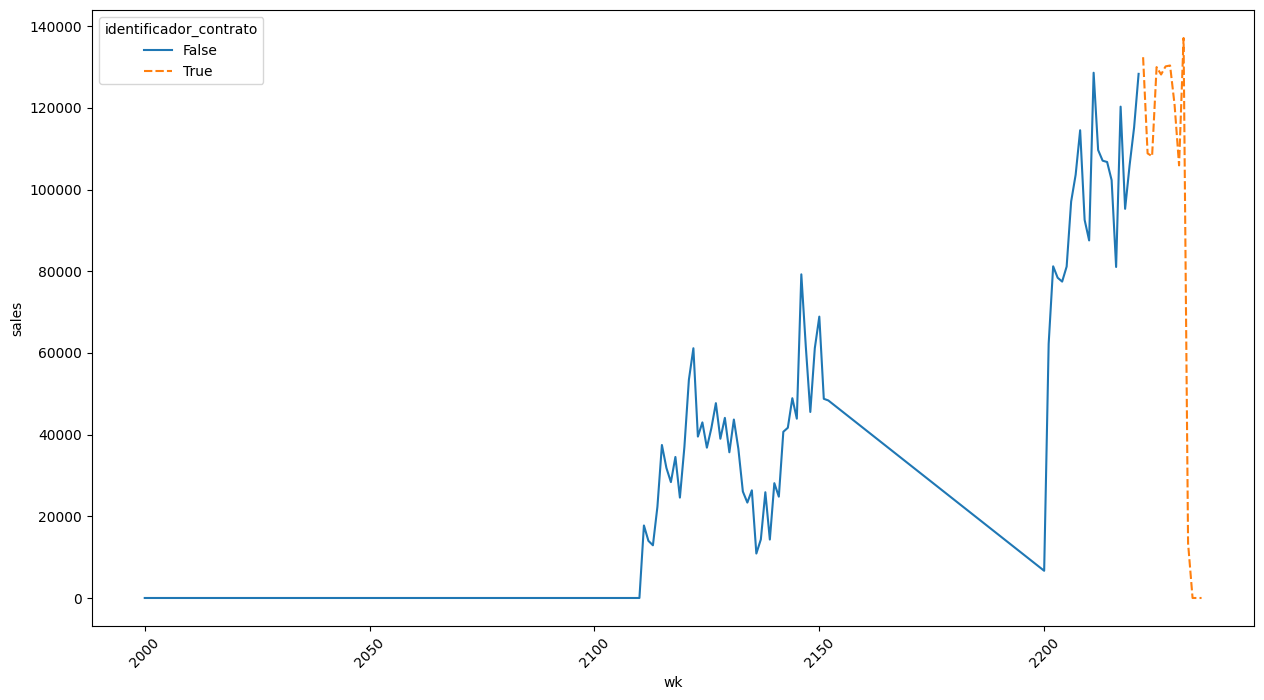

Comparativo de ventas cuando se tuvo o no contrato de: c68c0123-360c-4357-8364-8850bc08107e


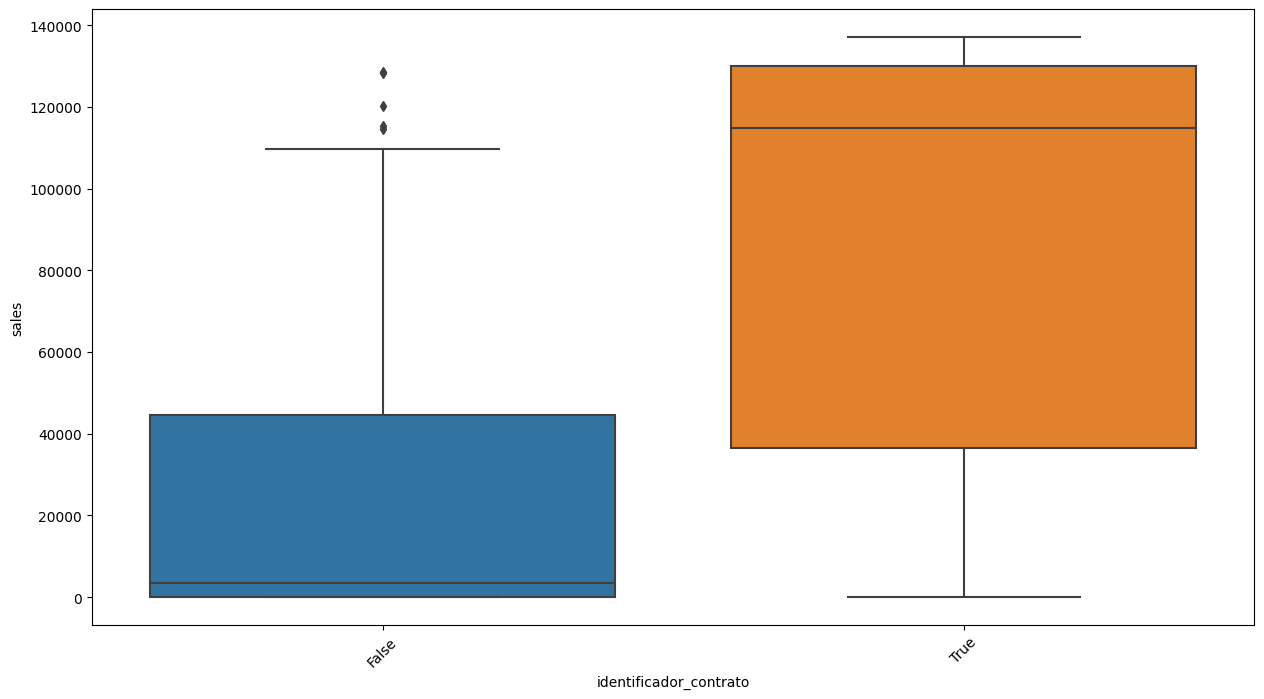

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
Se rechaza que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  ccec5a3c-6782-43f2-94e7-e67806266c8b  identificando cuando se comenzo el contrato


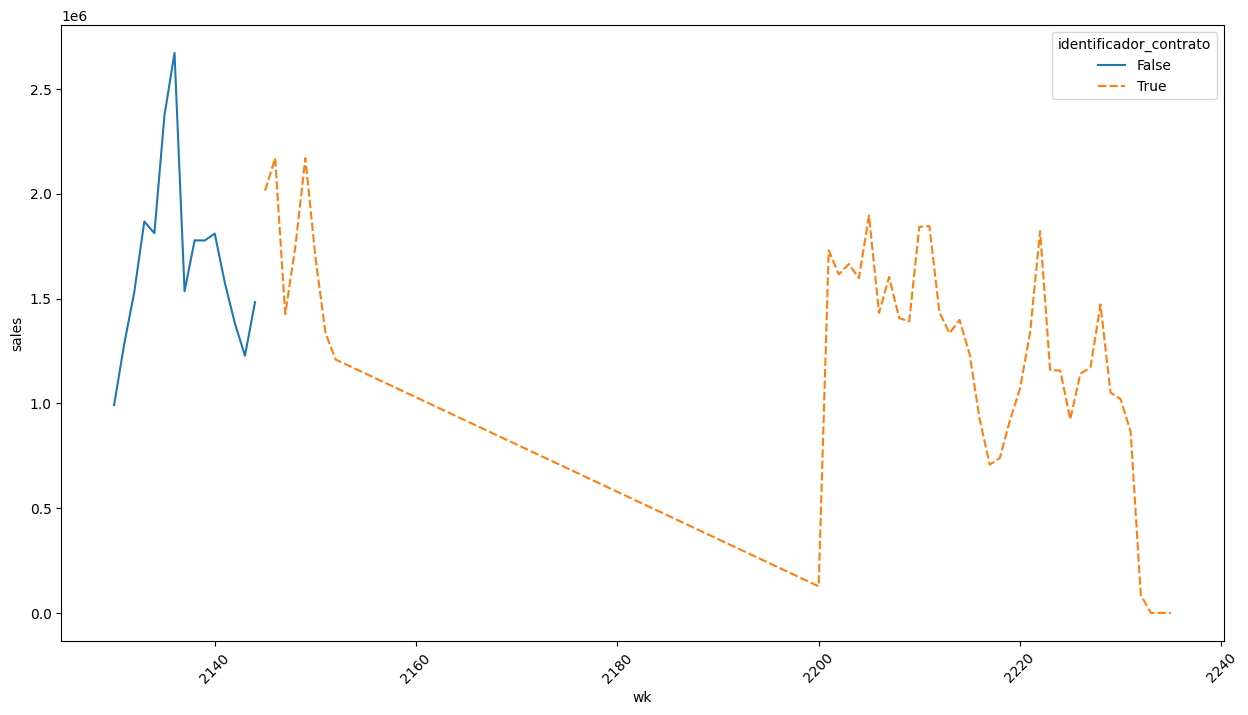

Comparativo de ventas cuando se tuvo o no contrato de: ccec5a3c-6782-43f2-94e7-e67806266c8b


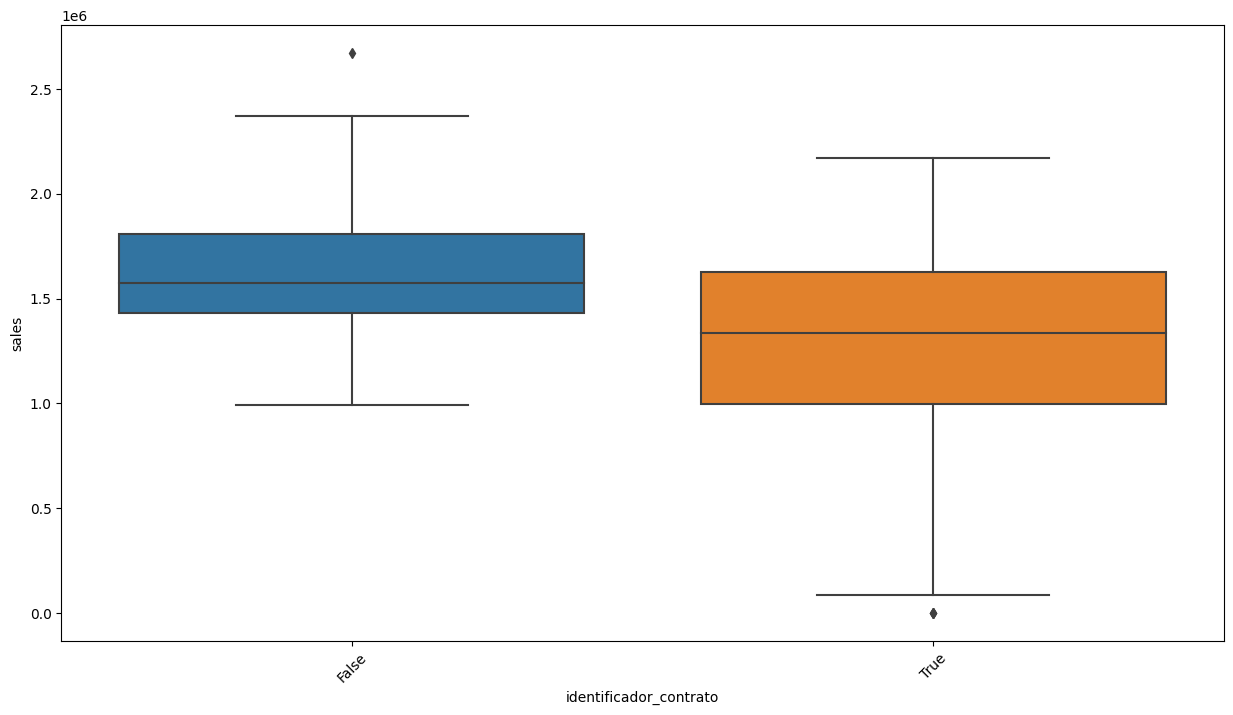

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
Se rechaza que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  dc9a7a7a-f7de-490c-aa22-f932e0d4199a  identificando cuando se comenzo el contrato


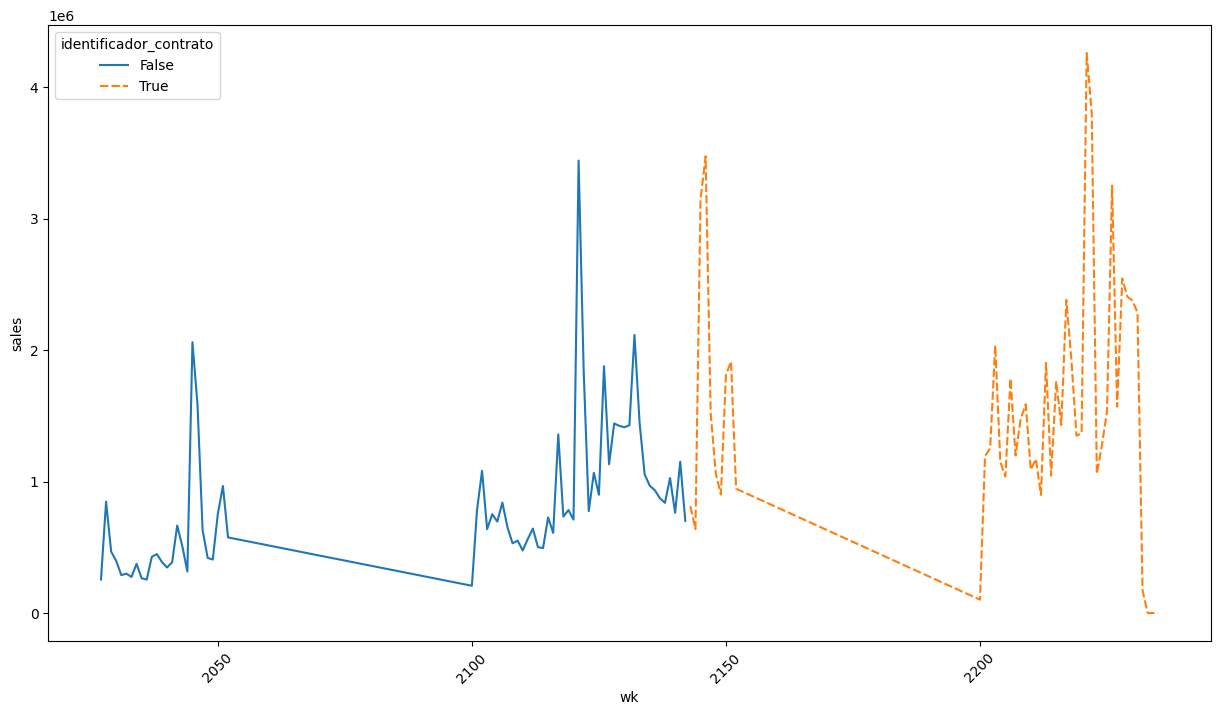

Comparativo de ventas cuando se tuvo o no contrato de: dc9a7a7a-f7de-490c-aa22-f932e0d4199a


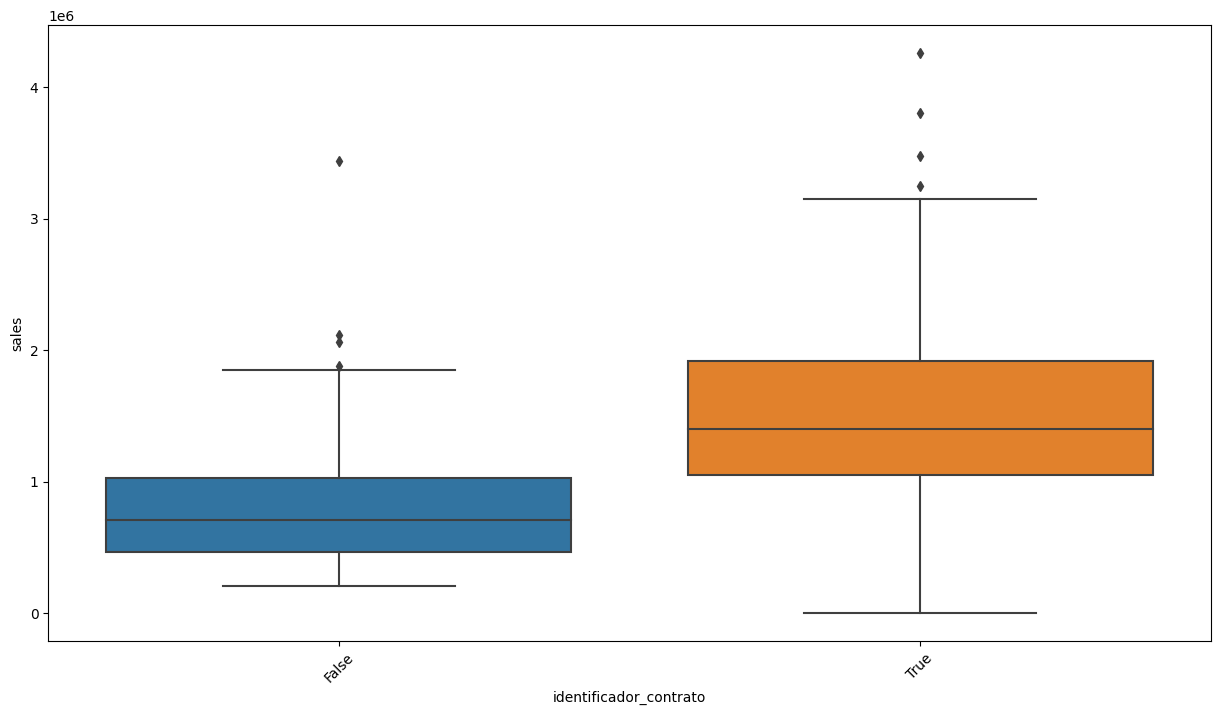

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
Se rechaza que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  f61b3749-9642-4a40-9414-14d631f8a506  identificando cuando se comenzo el contrato


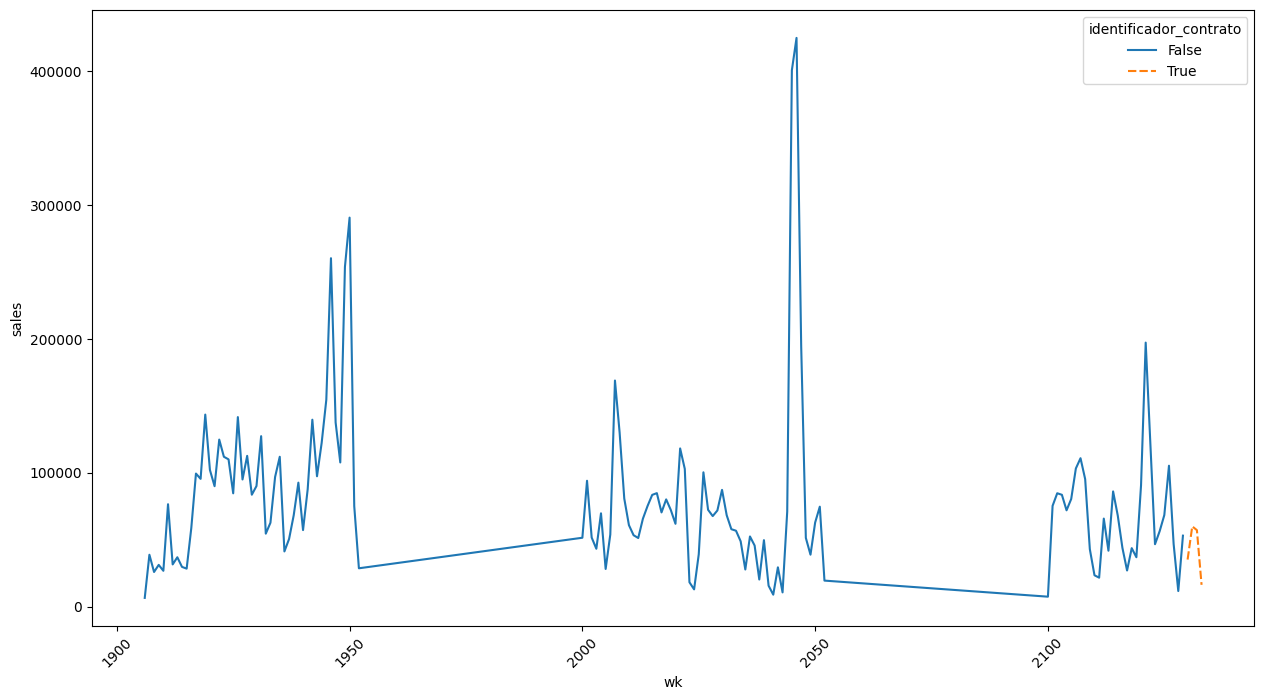

Comparativo de ventas cuando se tuvo o no contrato de: f61b3749-9642-4a40-9414-14d631f8a506


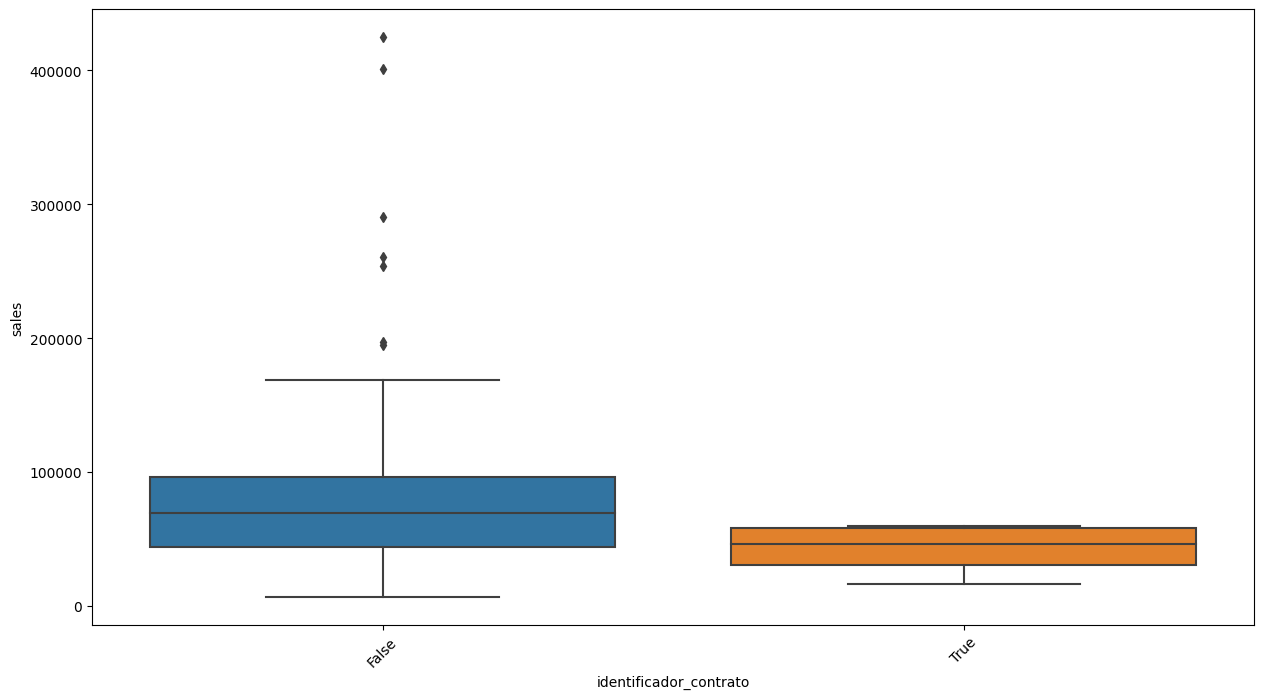

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------
historico de ventas por semana del cliente  fc054669-1734-4e44-a47c-e344302f8e17  identificando cuando se comenzo el contrato


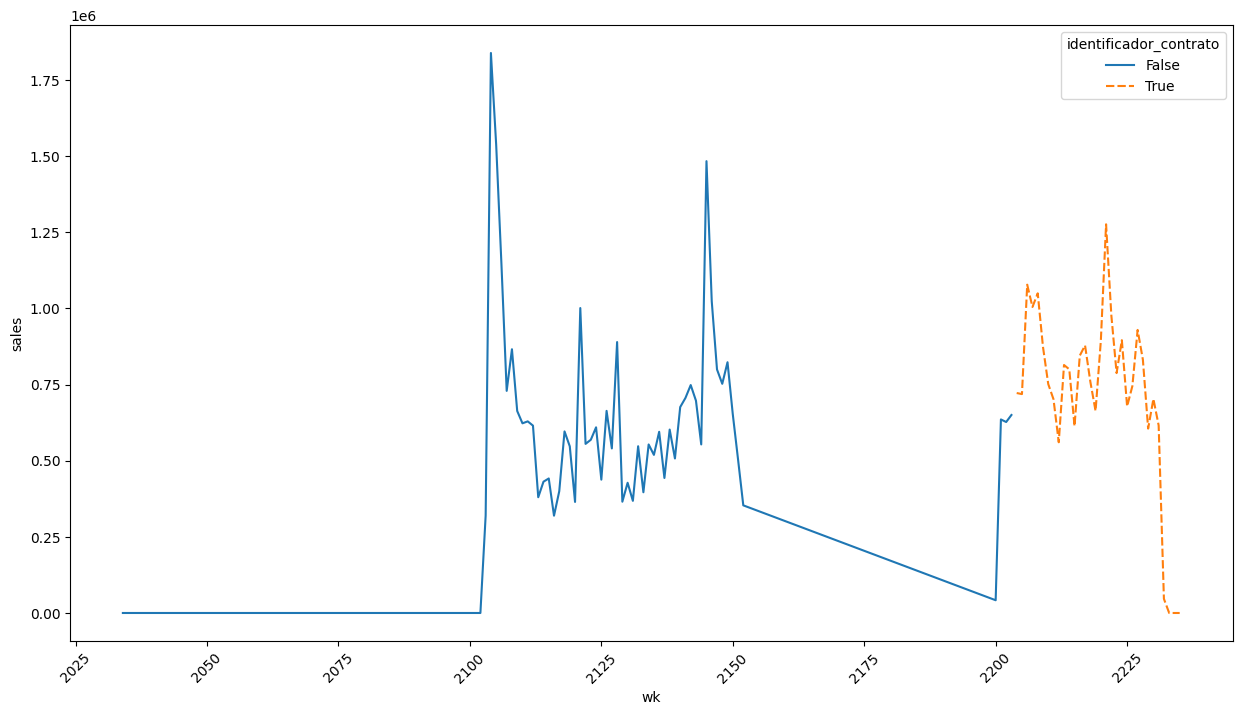

Comparativo de ventas cuando se tuvo o no contrato de: fc054669-1734-4e44-a47c-e344302f8e17


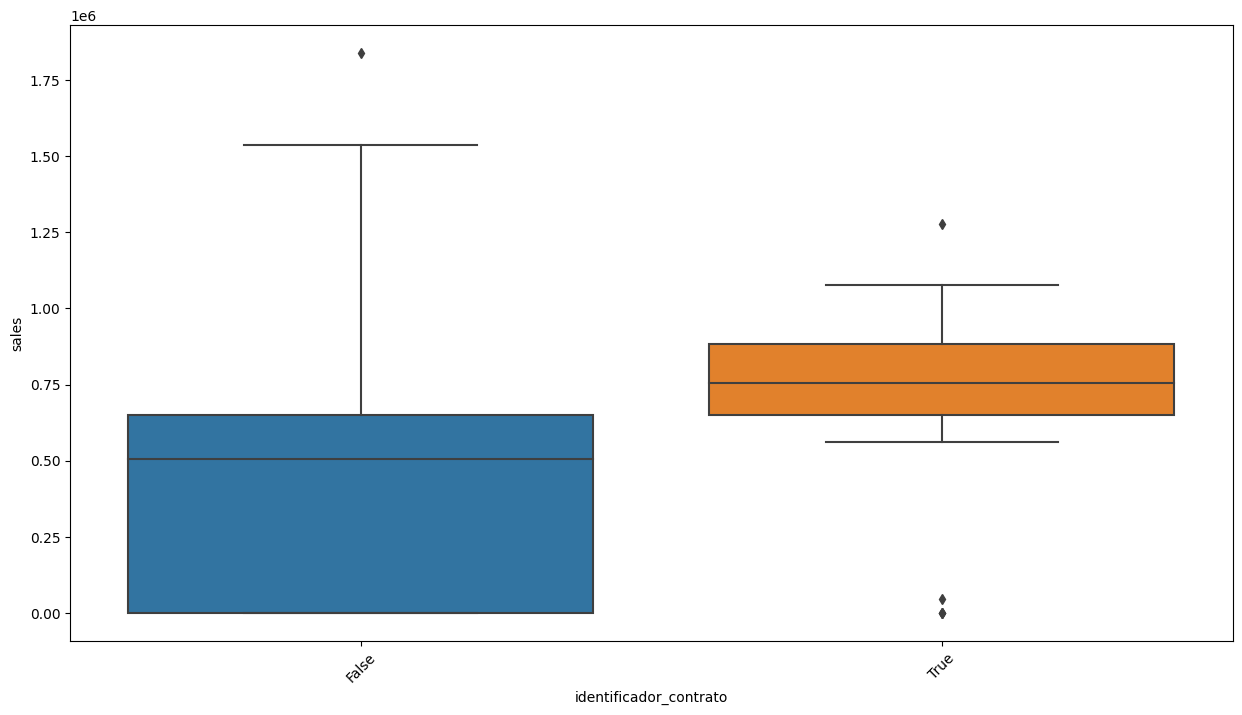

###
Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana
Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato
Se rechaza que el valor medio de las ventas con contrato es menor a sin contrato
###
Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato
No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato
------------------------------------------------------------------------------------------------------------------------------------------------------------


In [140]:
alpha = 0.05

for c in clientes:

    plt.figure(figsize=(15,8))
    
    print("historico de ventas por semana del cliente ", c, " identificando cuando se comenzo el contrato")

    sns.lineplot(data = df[df["client_id"] == c], x="wk", y="sales", hue="identificador_contrato", style="identificador_contrato")

    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(15,8))

    print("Comparativo de ventas cuando se tuvo o no contrato de:", c)
    
    sns.boxplot(data = df[df["client_id"] == c], x="identificador_contrato", y="sales")

    plt.xticks(rotation=45)
    plt.show()

    data_contract = df[(df["client_id"] == c) & (df["identificador_contrato"] == True)]
    data_no_contract = df[(df["client_id"] == c) & (df["identificador_contrato"] == False)]

    print("###")

    print("Se realiza un contraste de hipotesis sobre la igualdad de las ventas medias por semana")

    t_value, p_value = st.ttest_ind(data_contract["sales"], data_no_contract["sales"])

    if p_value < alpha:
        print("Se rechaza que el valor medio de las ventas con contrato es igual a sin contrato")
    else:
        print("No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es igual a sin contrato")

    print("###")
    
    print("Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas sin contrato fueron mayores a los con contrato")

    t_value, p_value = st.ttest_ind(data_contract["sales"], data_no_contract["sales"], alternative="greater")

    if p_value < alpha:
        print("Se rechaza que el valor medio de las ventas con contrato es menor a sin contrato")
    else:
        print("No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es menor a sin contrato")
    
    print("###")

    print("Se realiza un contraste de hipotesis para verificar los casos donde la media de ventas con contrato fueron mayores a los sin contrato")

    t_value, p_value = st.ttest_ind(data_contract["sales"], data_no_contract["sales"], alternative="less")

    if p_value < alpha:
        print("Se rechaza que el valor medio de las ventas con contrato es mayor a sin contrato")
    else:
        print("No se encuentra evidencia para rechazar que el valor medio de las ventas con contrato es mayor a sin contrato")
    


    print("------------------------------------------------------------------------------------------------------------------------------------------------------------")
    


Se encuentra que, en algunos casos la media de ventas de los clientes por semana se han visto incrementadas despues de adquirir el contrato, pero no en todos los casos, la mayoria de los casos donde se tiene poco tiempo desde el contrato no se ve mucha diferencia en las ventas.